# LAB 1-2

## The Sloan Digital Sky Survey which offers public data of space observations.

### This dataset consists of 10,000 records of observations of space taken by the Sloan Digital Sky Survey. Every observation is described by 17 feature columns and 1 target column which identifies the observation to be a star, a galaxy or a quasar.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import scipy as sp
import thinkplot
import thinkstats2
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smtsa

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12

In [14]:
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

In [48]:
data = pd.read_csv("Skyserver.csv", parse_dates = [0], error_bad_lines=False)

In [15]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.23765E+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.23765E+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.23765E+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.23765E+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.23765E+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [16]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null object
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(9), int64(7), object(2)
memory usage: 1.4+ MB


In [22]:
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [20]:
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [18]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing')

,column_name,percent_missing
objid,objid,0.0
plate,plate,0.0
redshift,redshift,0.0
class,class,0.0
specobjid,specobjid,0.0
field,field,0.0
camcol,camcol,0.0
rerun,rerun,0.0
run,run,0.0
z,z,0.0


#### As we can see there're no missing values

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,NaN,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,NaN,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,NaN,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,NaN,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,NaN,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,NaN,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,NaN,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,NaN,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,NaN,1.000000,-0.067921,0.040809,0.006834,0.040795,0.026284,0.535629


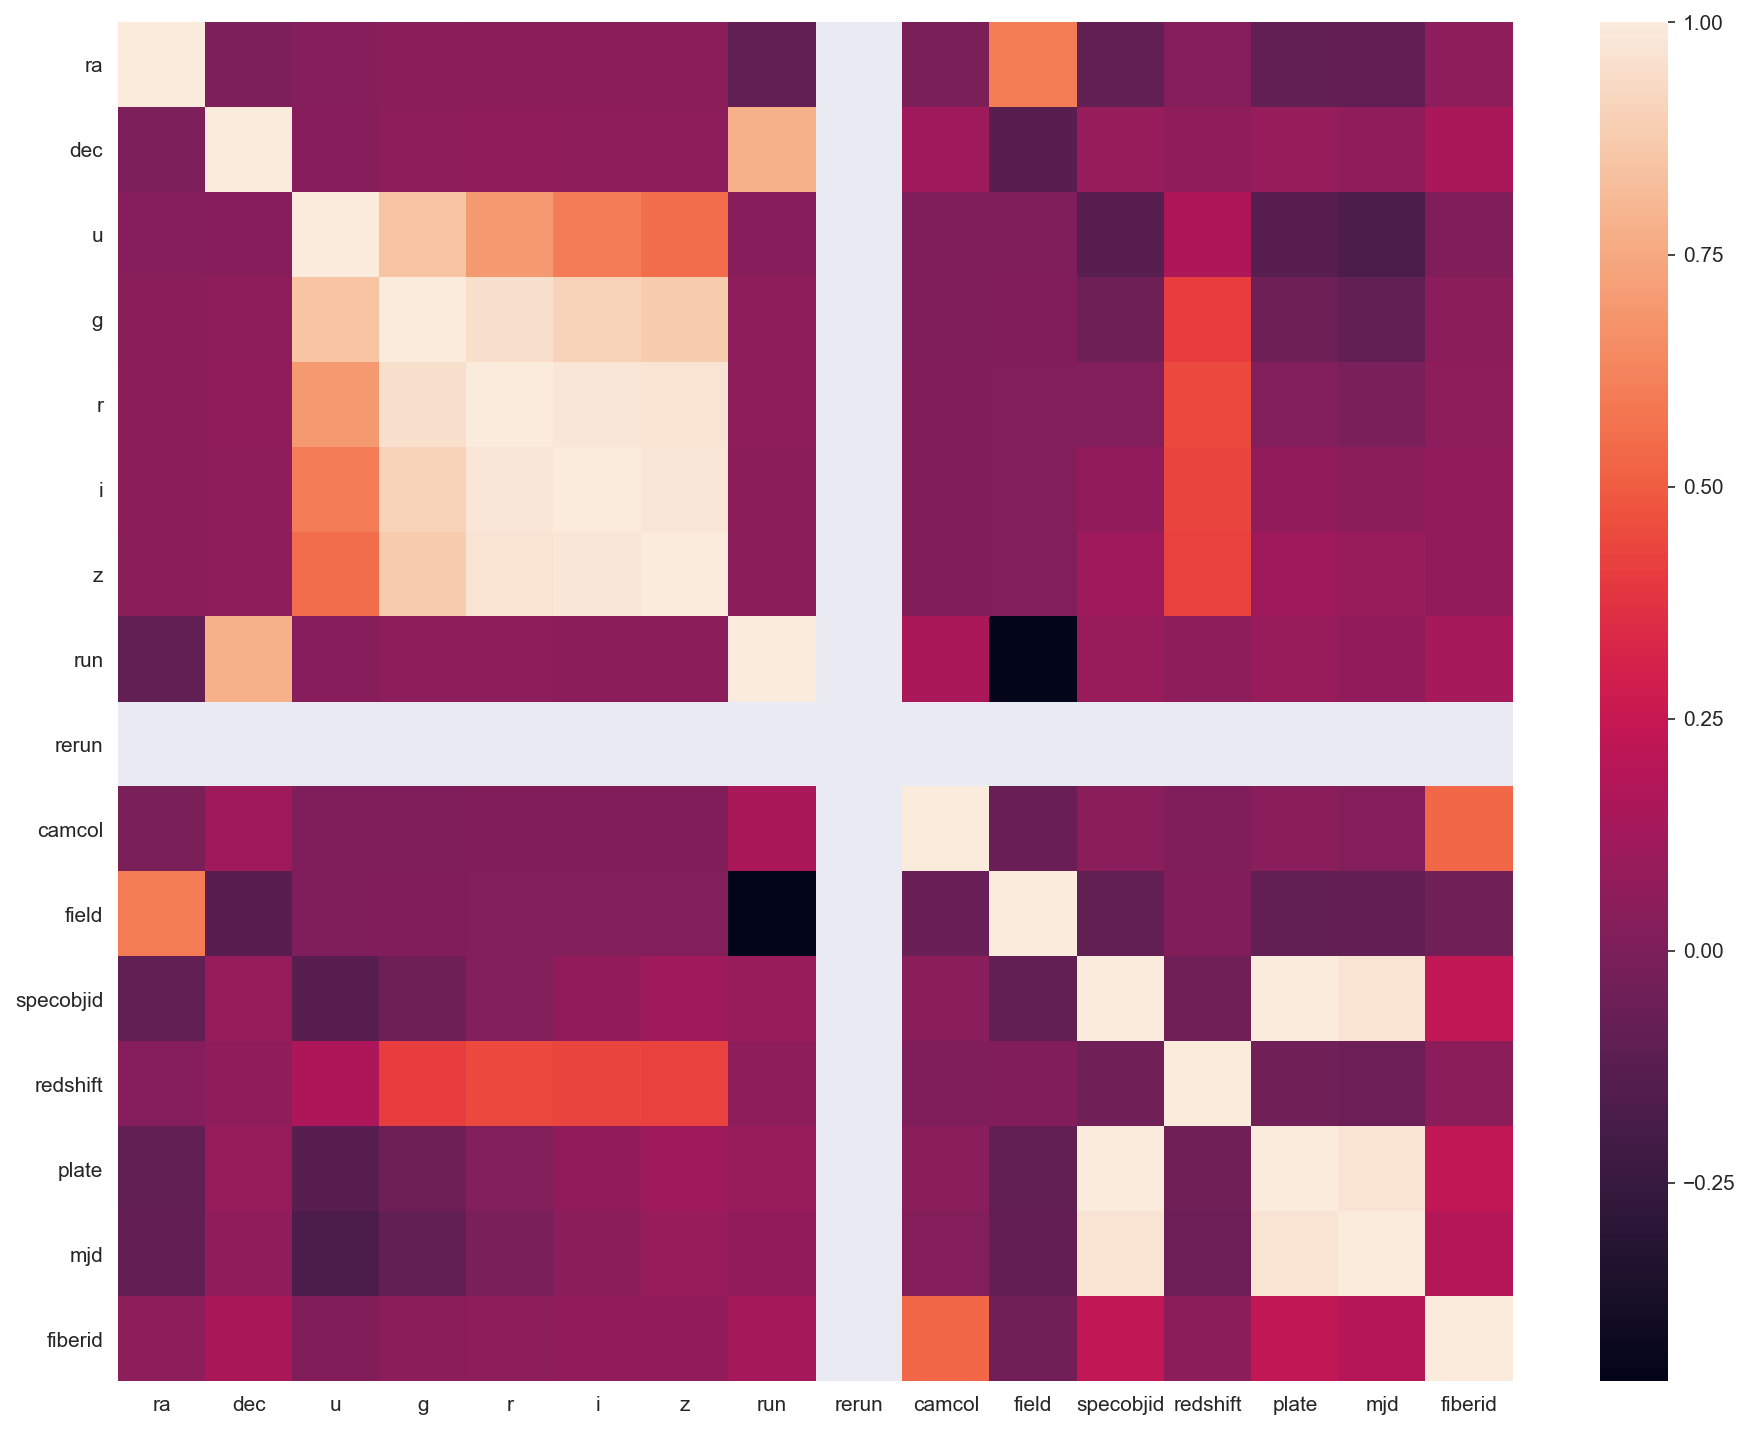

In [19]:
sns.heatmap(data.corr())
data.corr()

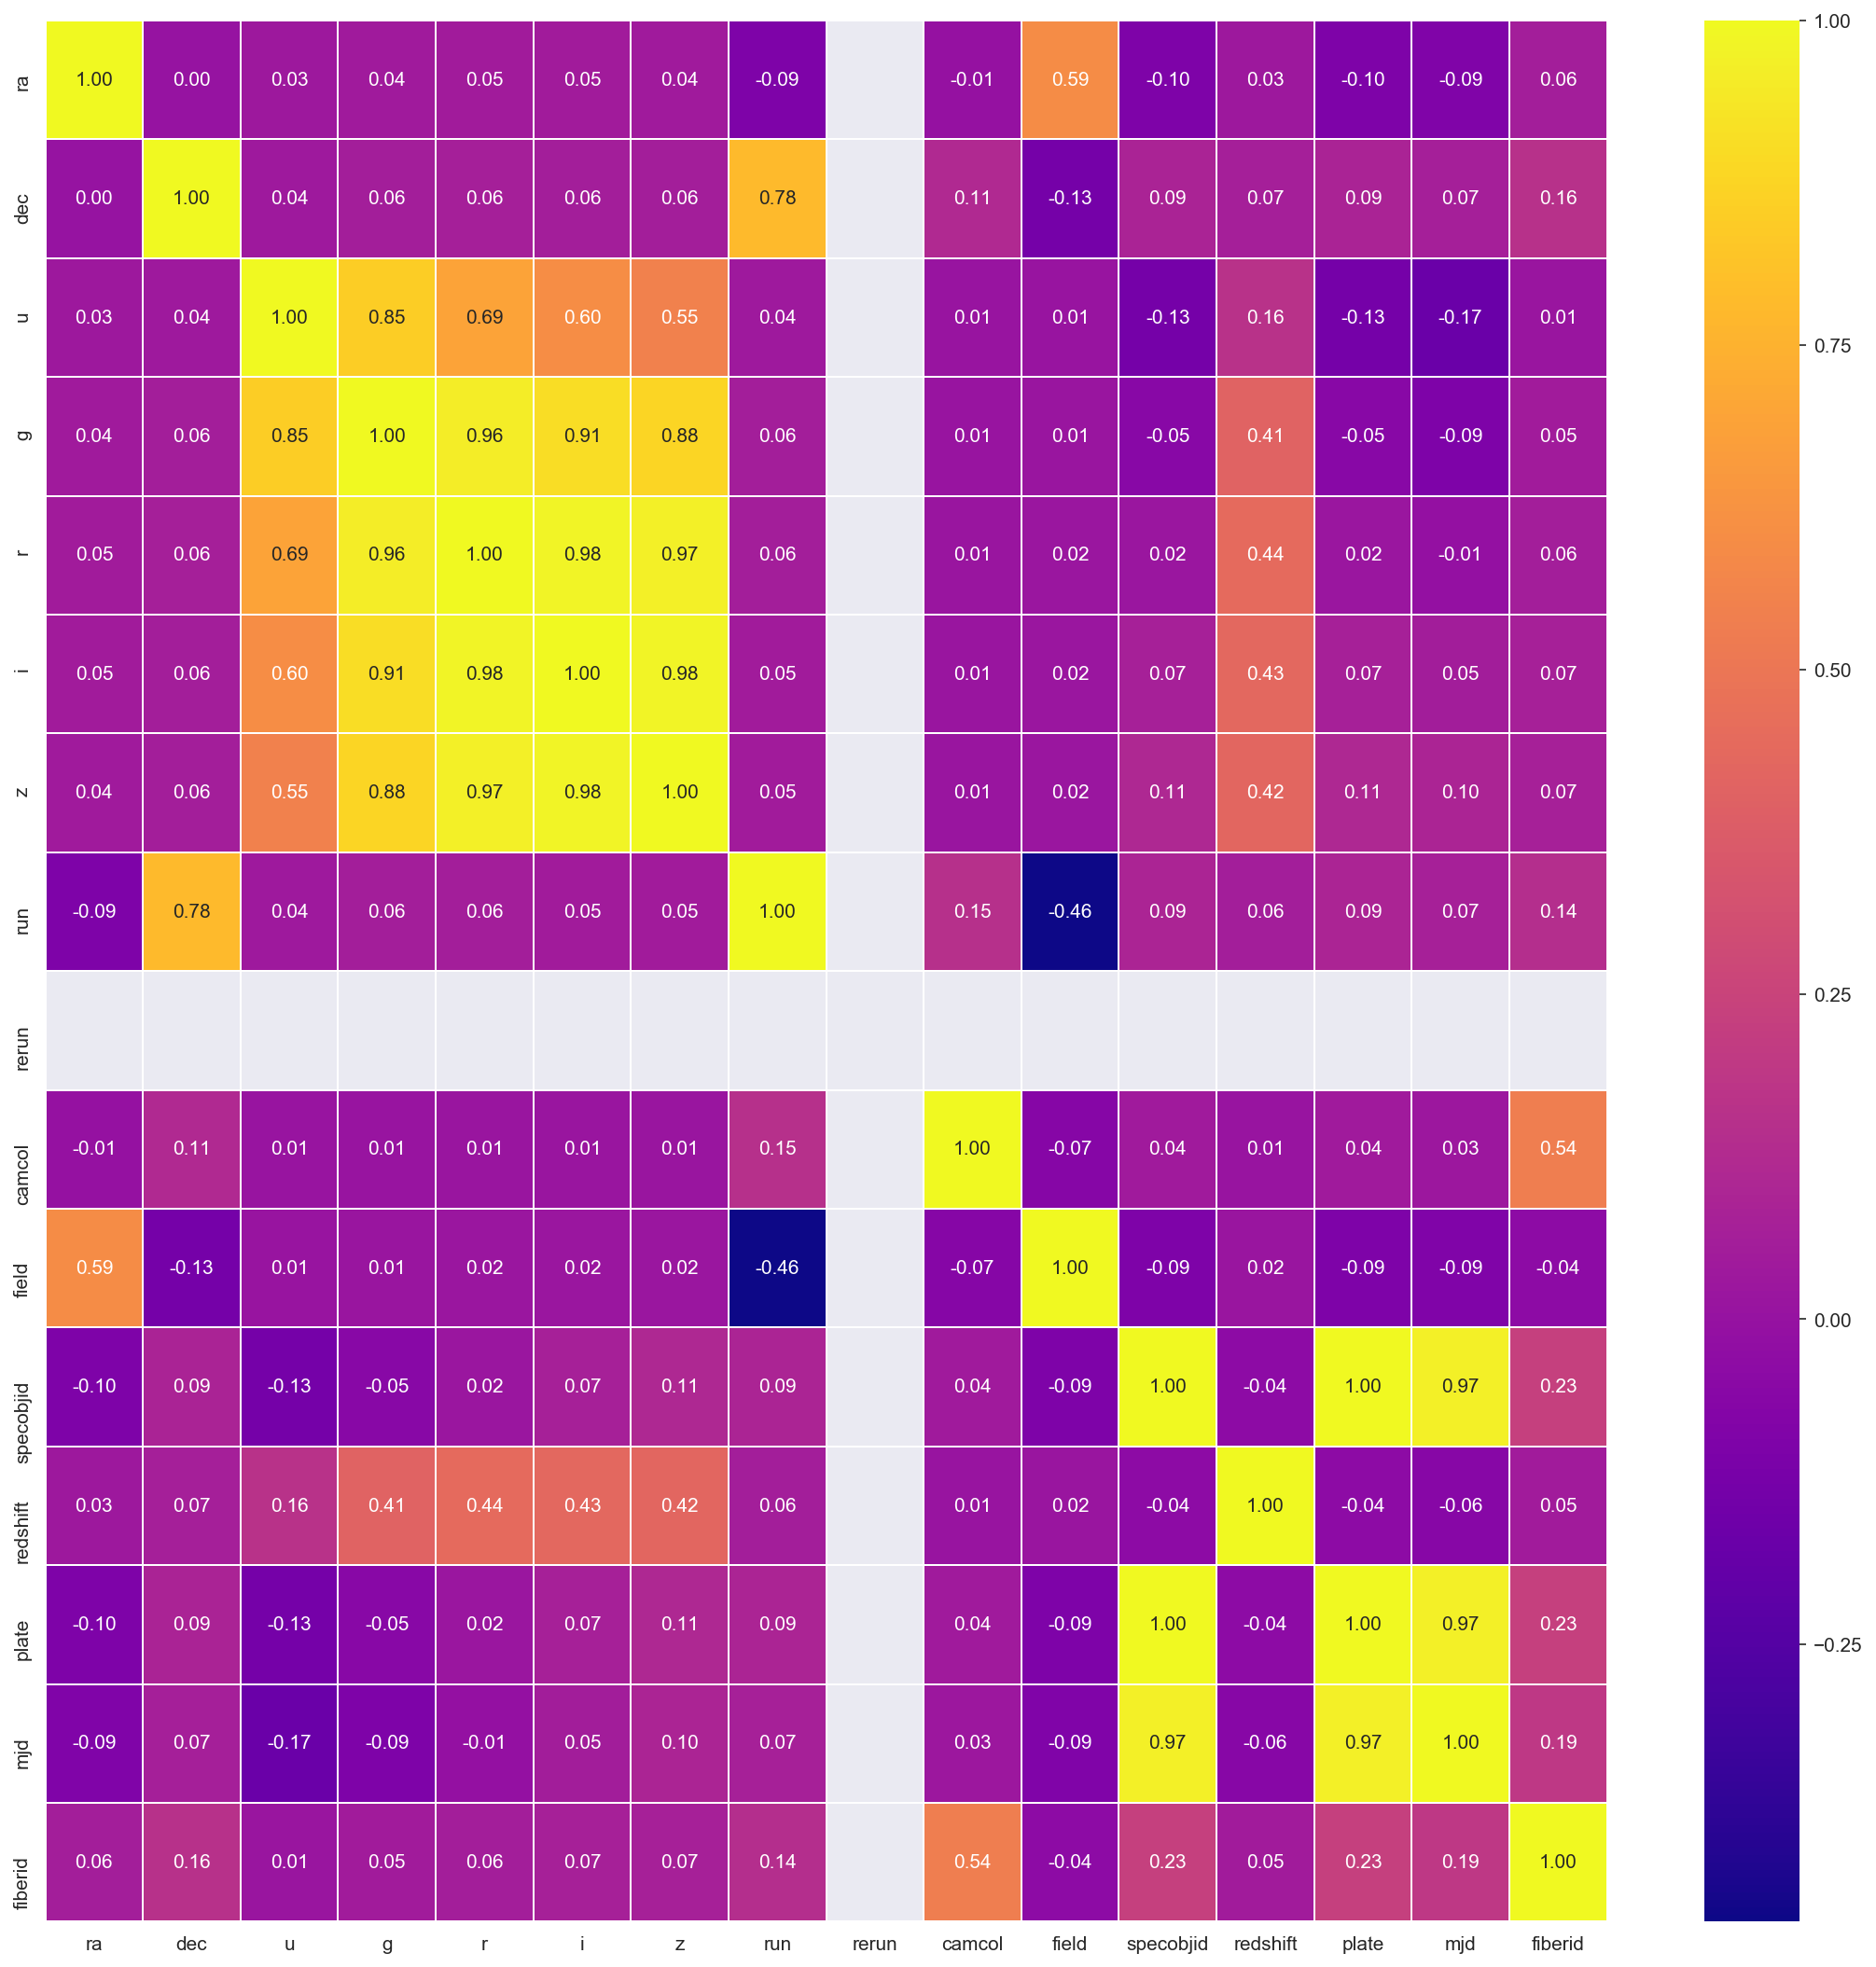

In [24]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(), annot=True,linewidths=.5, fmt= '.2f',ax=ax,cmap="plasma")
plt.show()

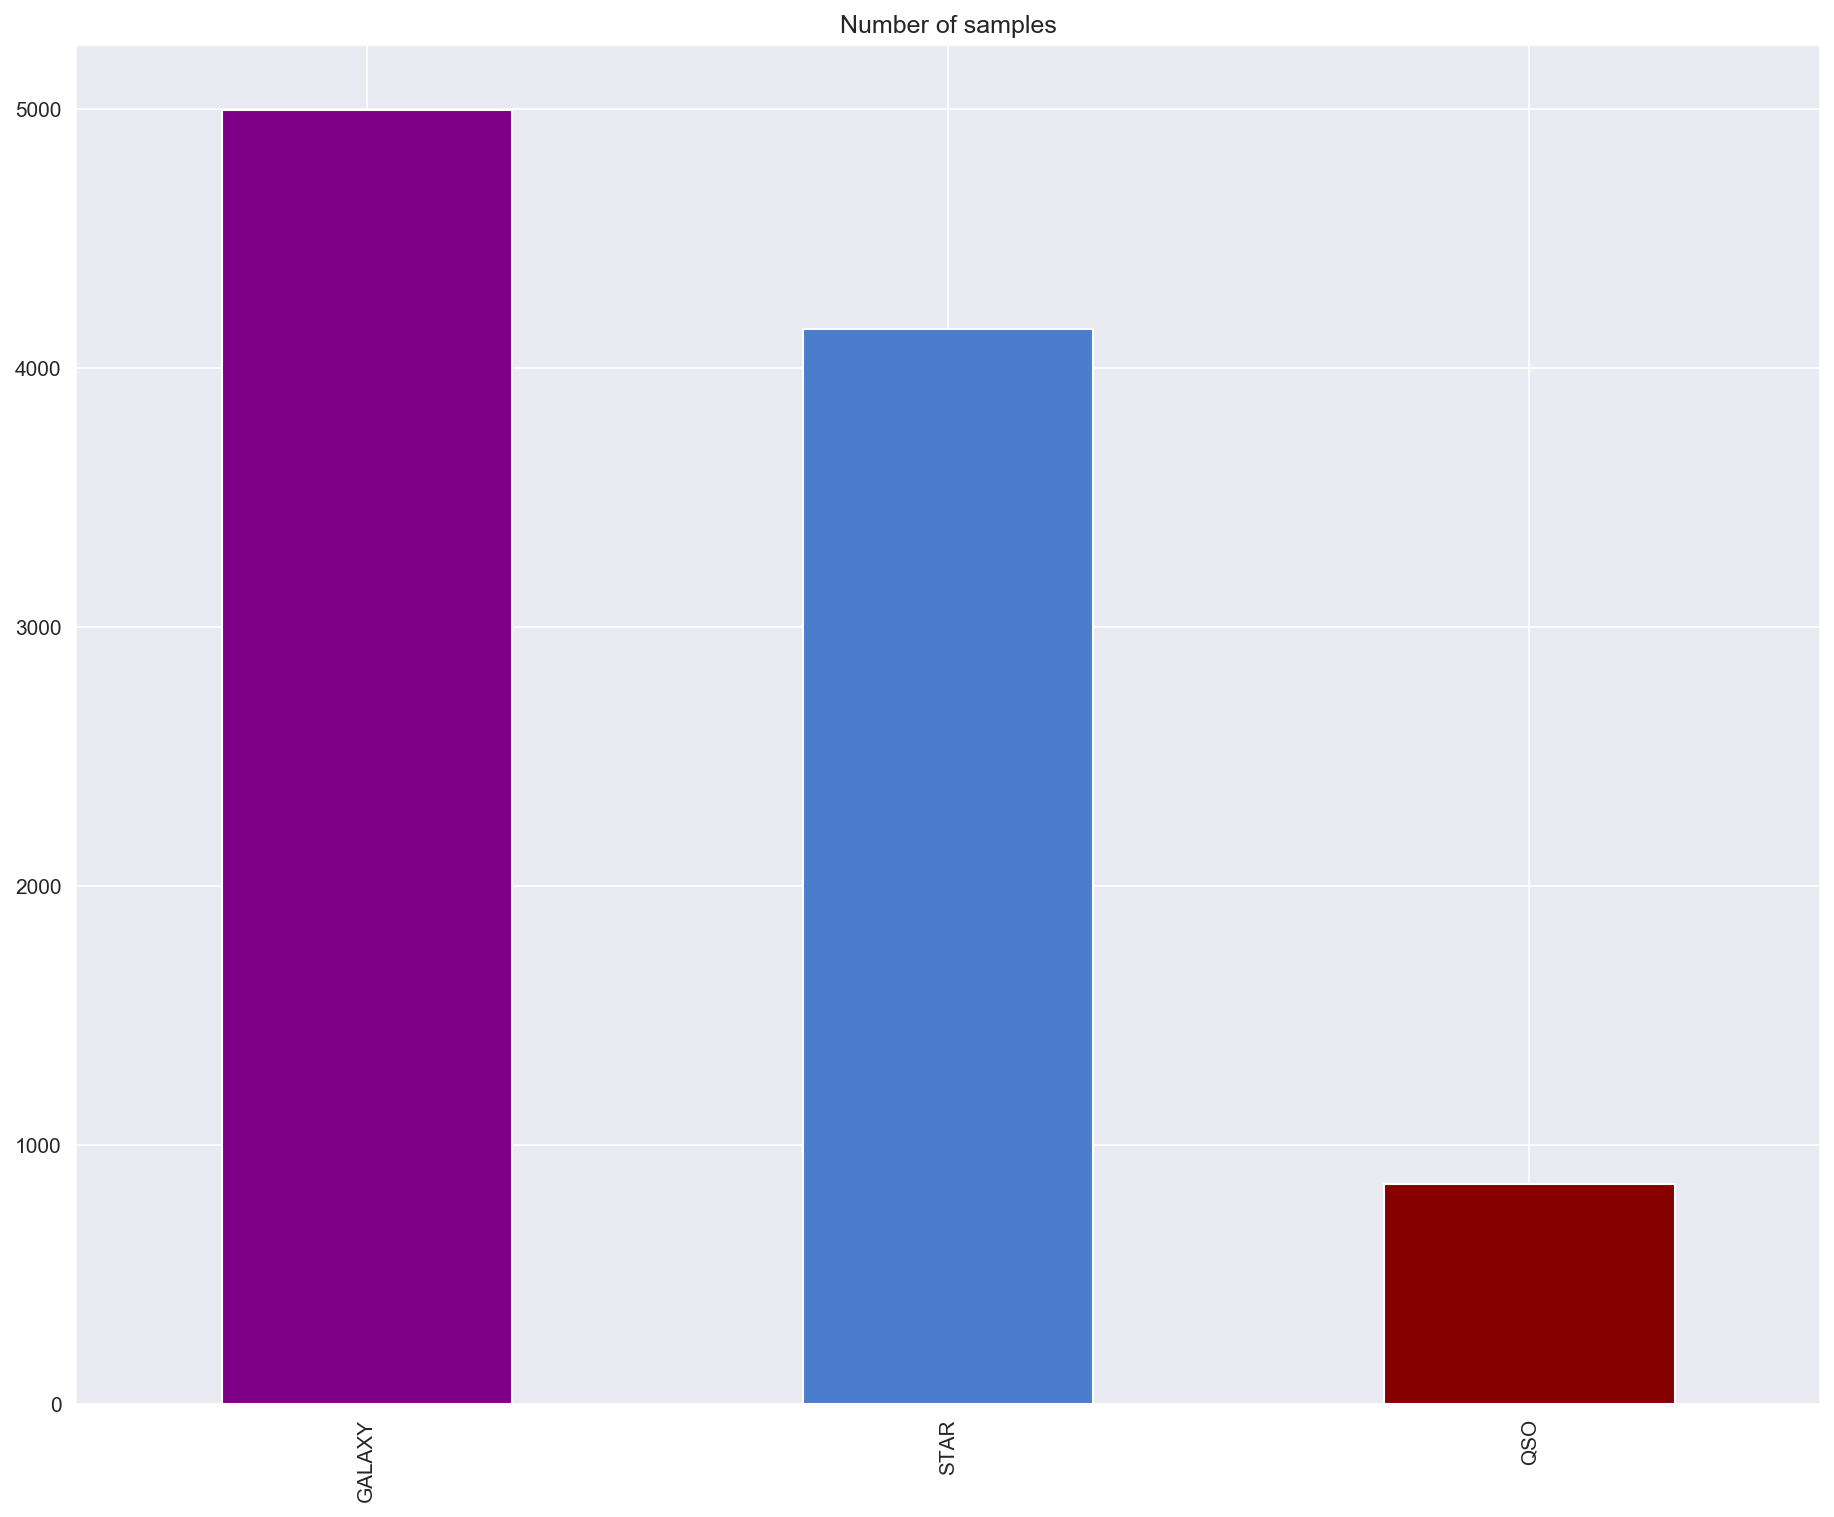

In [25]:
data['class'].value_counts()

star_color='#4a7dce'
galaxy_color='#7e0087'
qso_color='#870000'

array_color=[star_color, galaxy_color, qso_color]

data['class'].value_counts().plot(kind='bar',title='Number of samples', color=['#7e0087','#4a7dce','#870000']);

In [30]:
data['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

#### So the QSO is relatively very less in no. It's will need to do some sampling before we fit it into a model.

#### Lets take a look at the redshift.

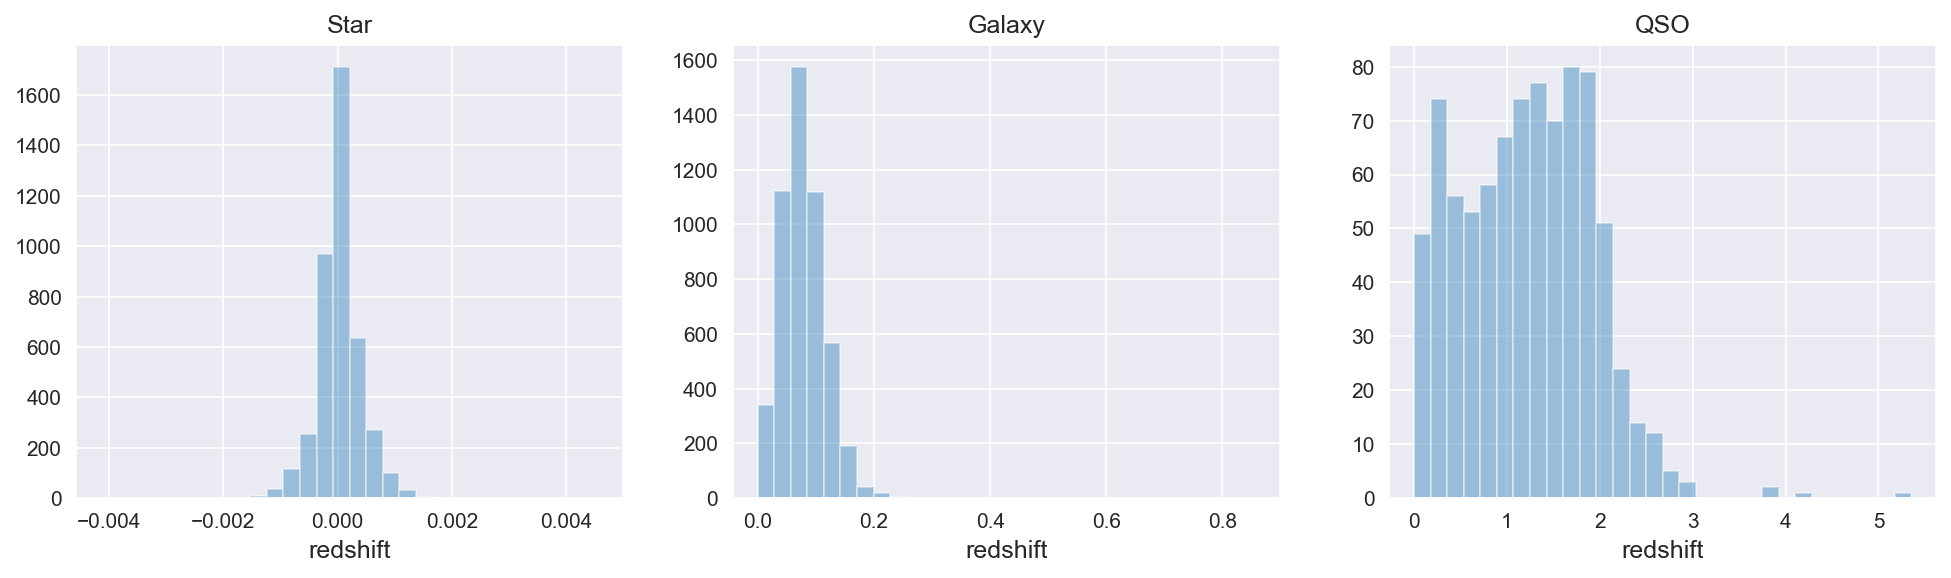

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(data[data['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

#### The redshift can be an estimate(!) for the distance from the earth to a object in space

#### Next we come to the Letter value plot. The Letter value (LV) Plot show us an estimate of the distribution of the data. It shows boxes which relate to the amount of values within the range of values inside the box

Text(0.5, 1.0, 'dec')

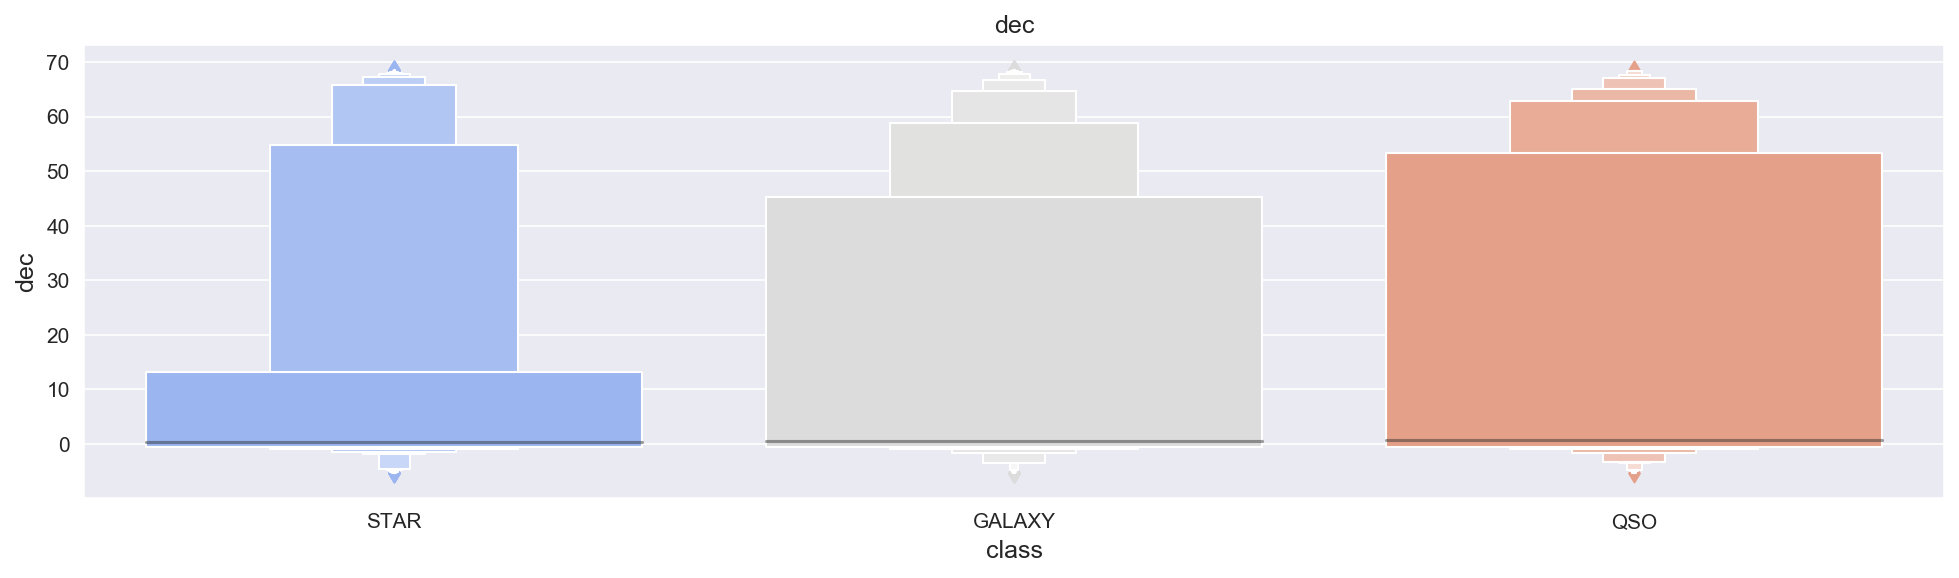

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax = sns.lvplot(x=data['class'], y=data['dec'], palette='coolwarm')
ax.set_title('dec')

#### One of the most popular methods to remove outliers is the boxplot method which we are going to try out first.¶

In [49]:
df = data.copy()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null object
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(9), int64(7), object(2)
memory usage: 1.4+ MB


In [51]:
df.drop(['specobjid','fiberid'],axis=1,inplace=True)

In [52]:
di = {'STAR':1,'GALAXY':2,'QSO':3}
df.replace({'class':di}, inplace=True)

#### Before it proceed Imma going to separate the "class" and drop the "objid".

In [53]:
y = df['class']
df.drop(['objid','class'], axis=1, inplace=True)

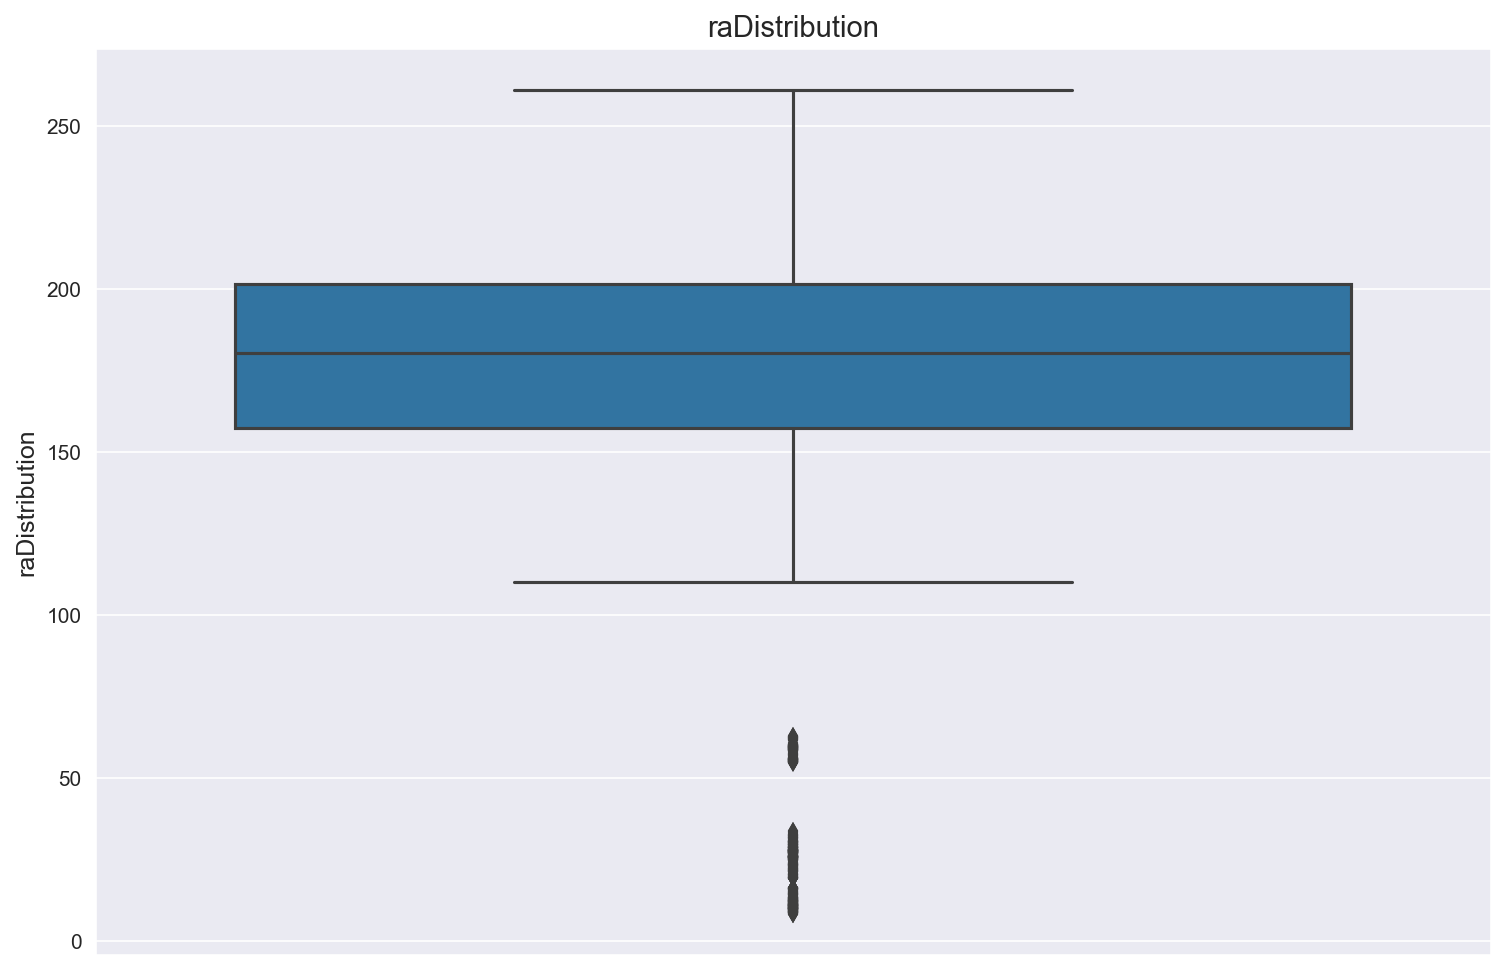

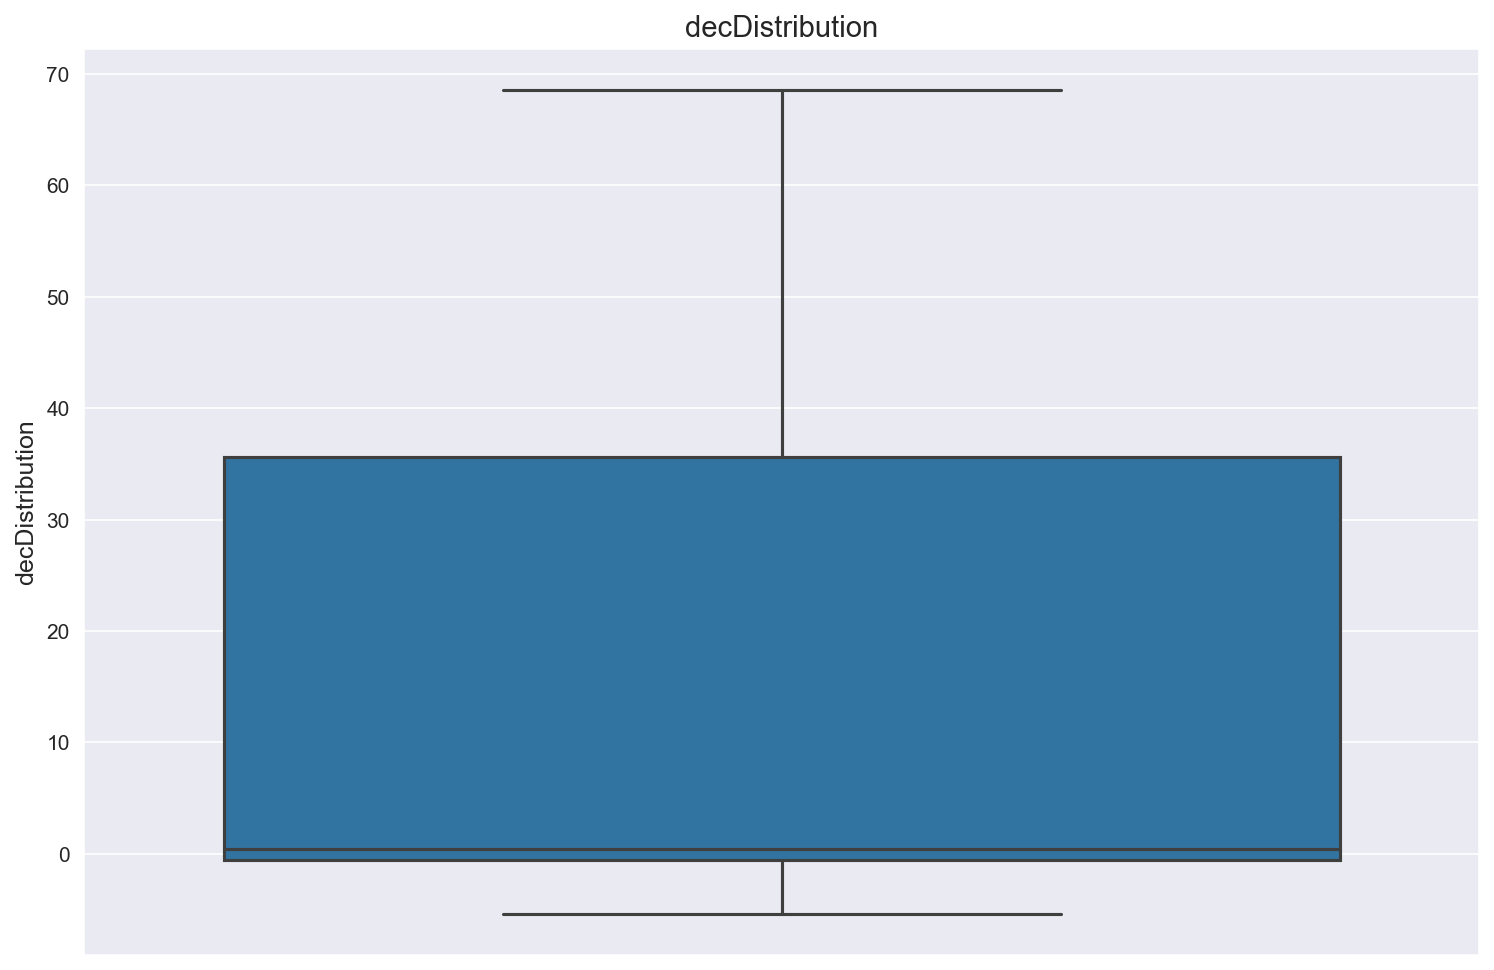

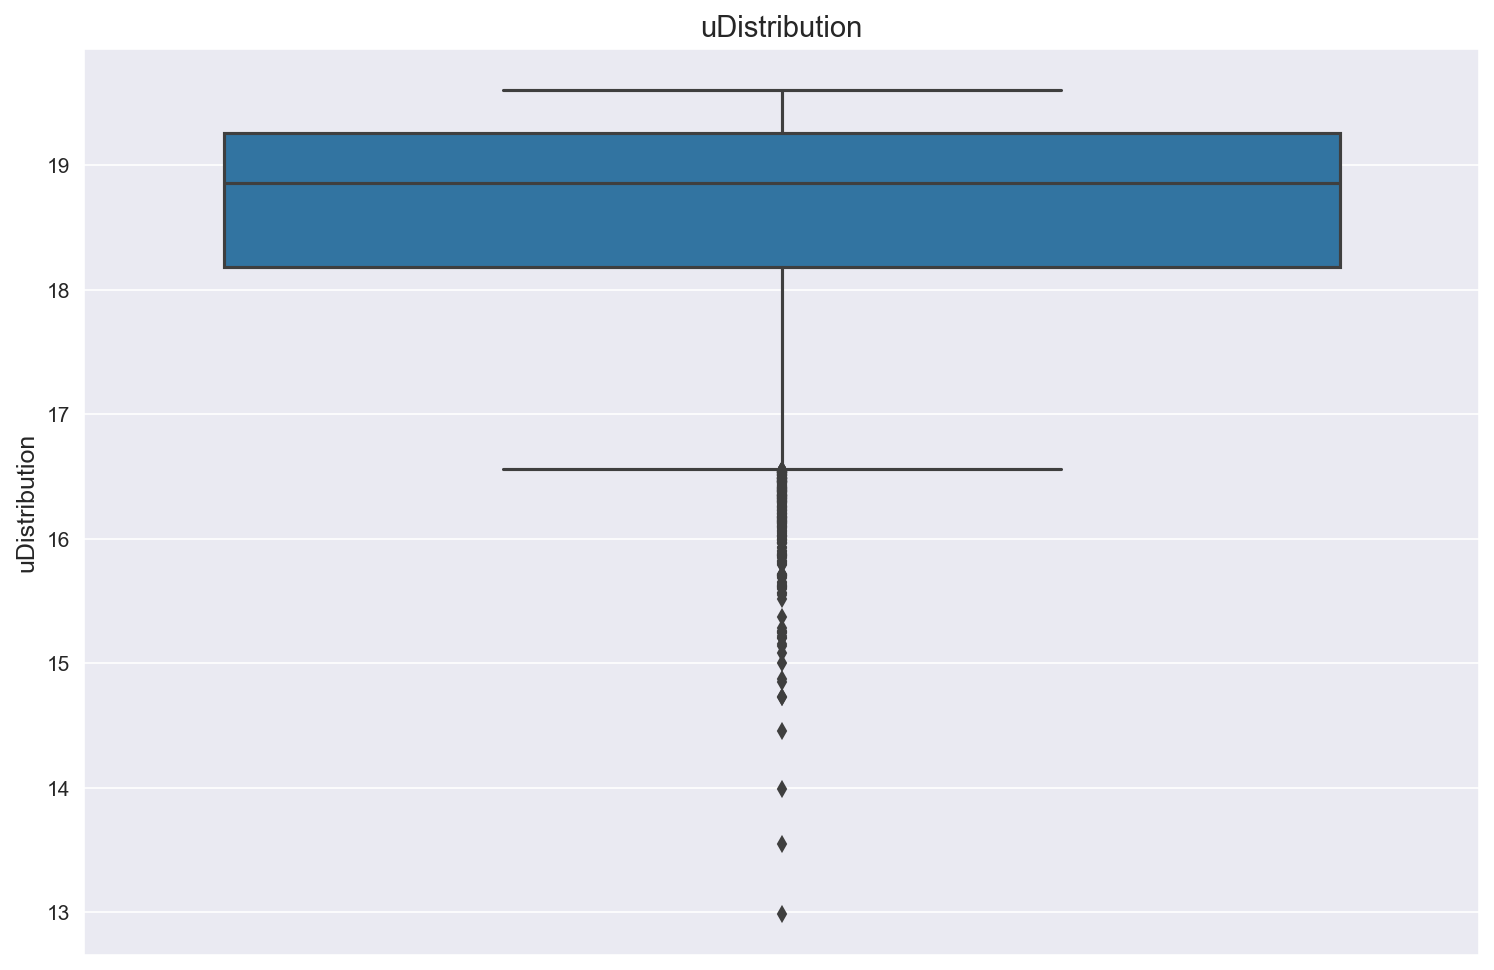

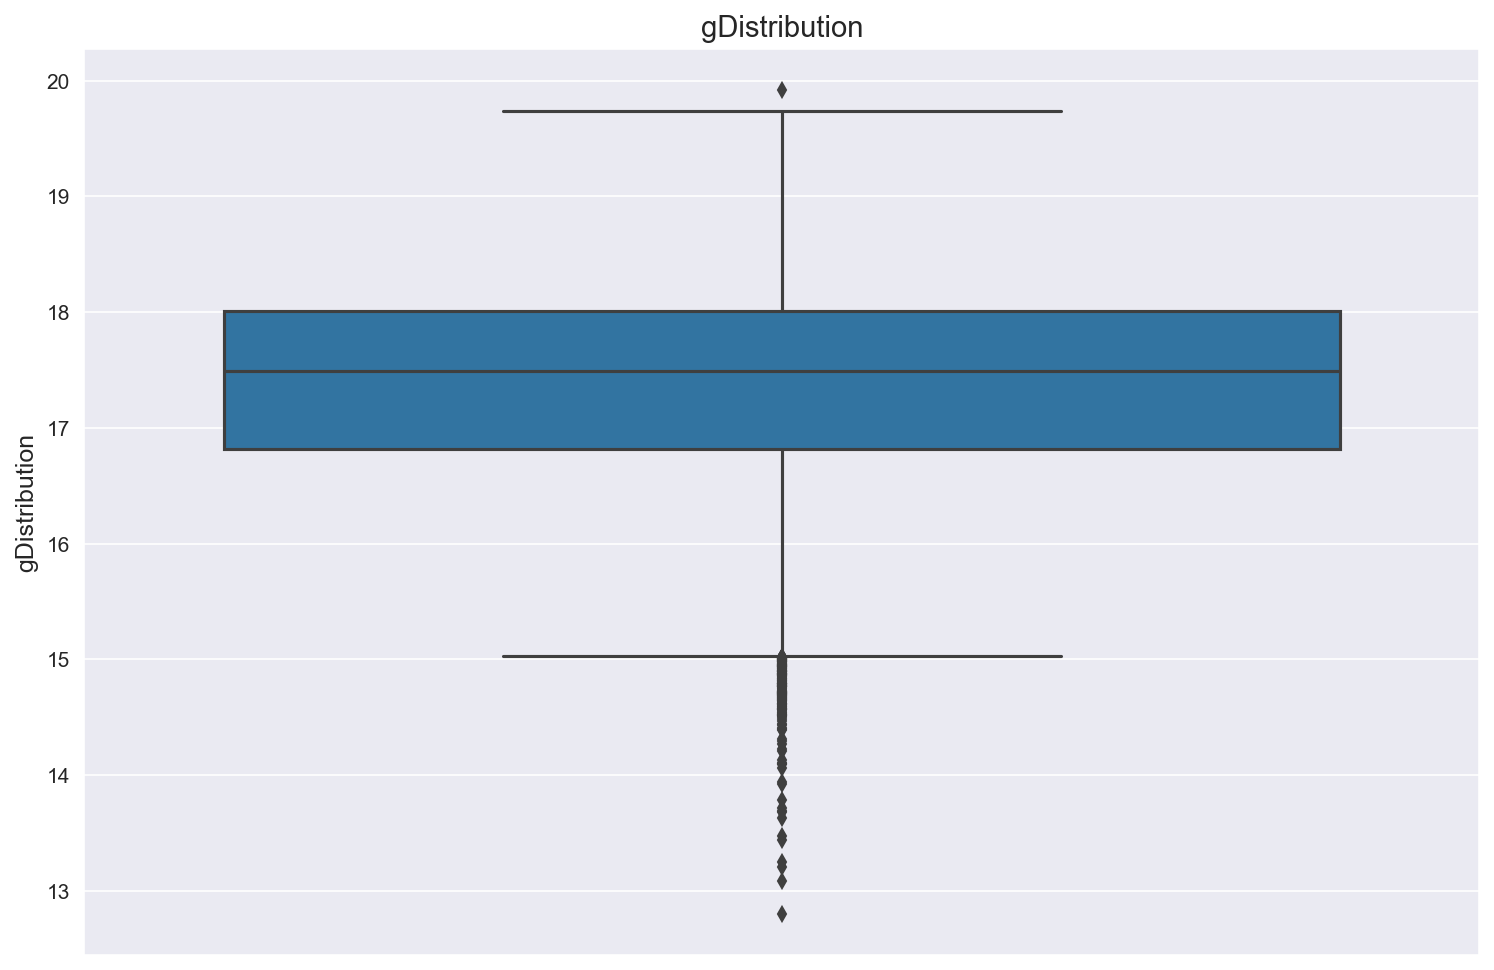

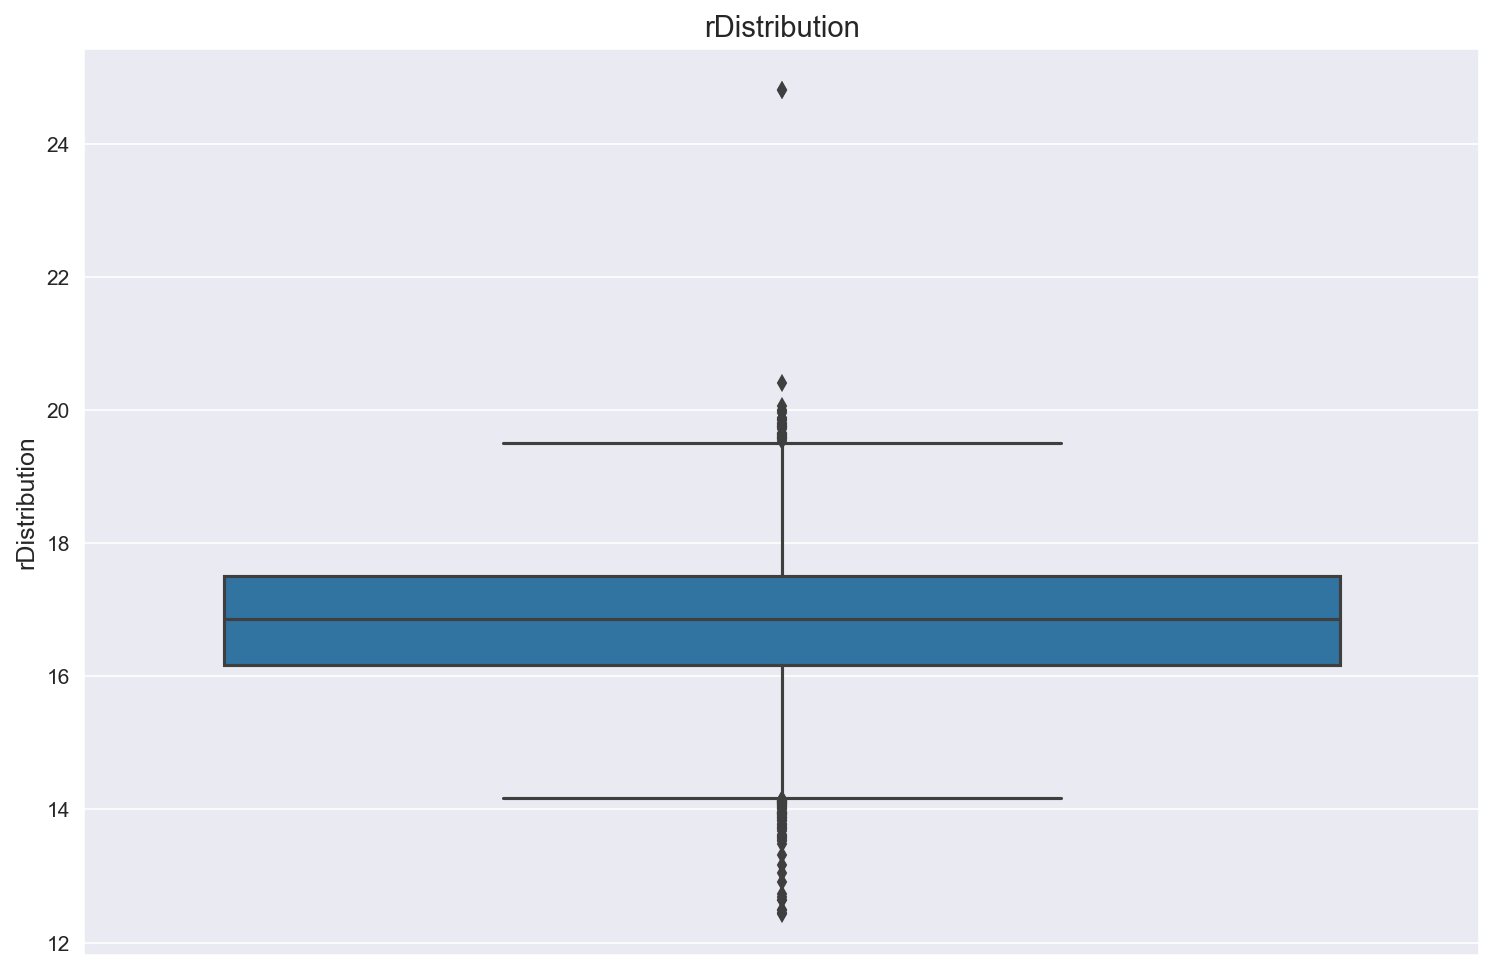

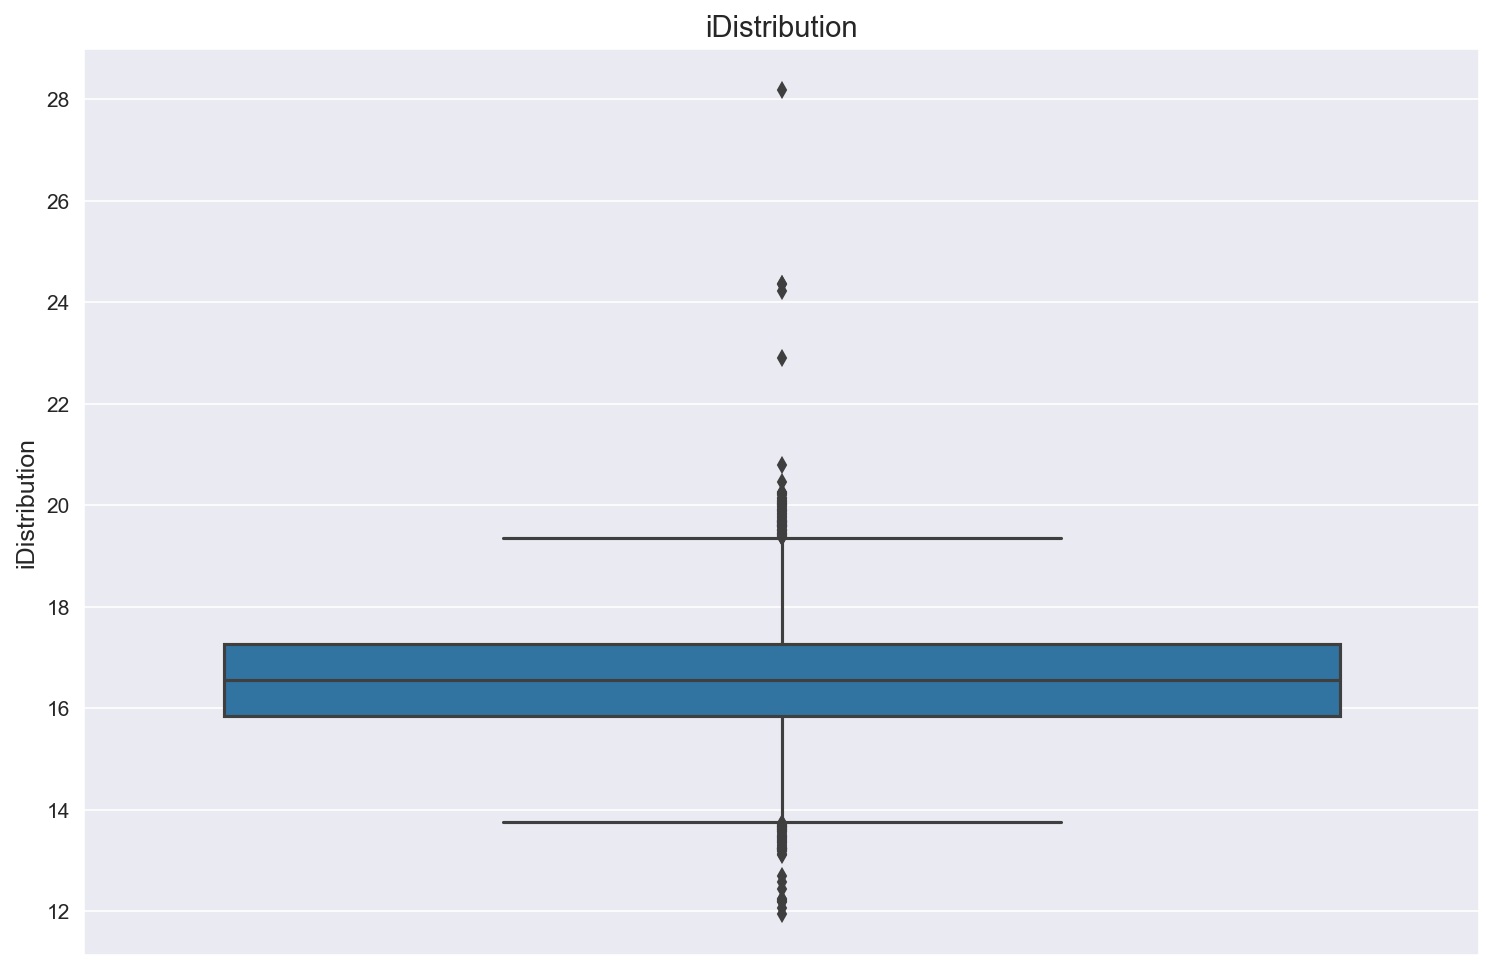

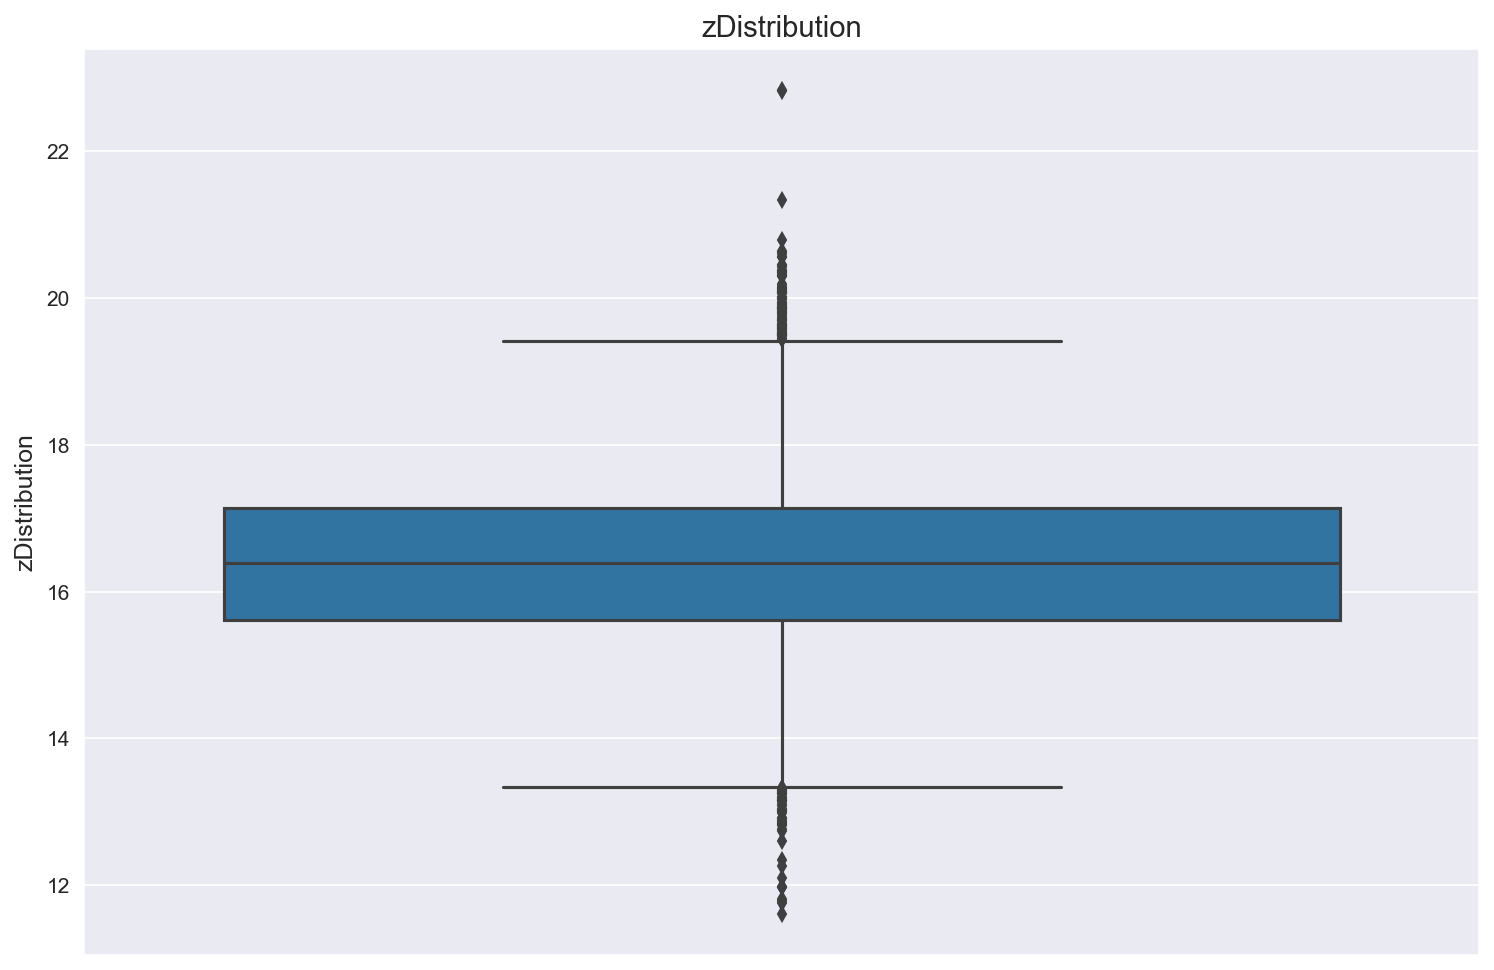

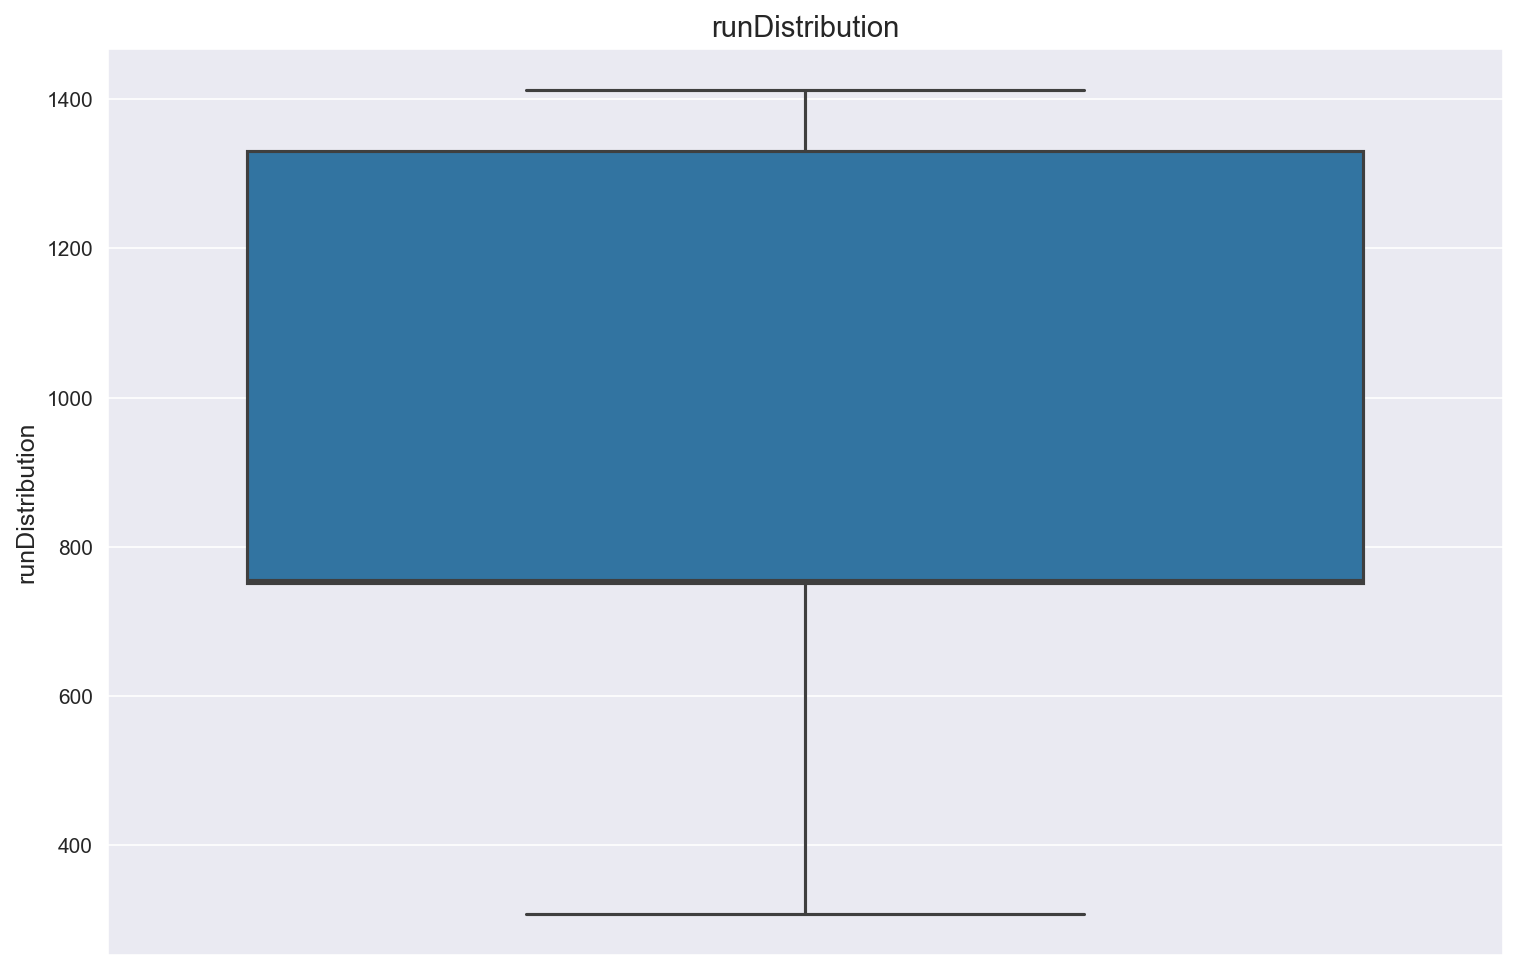

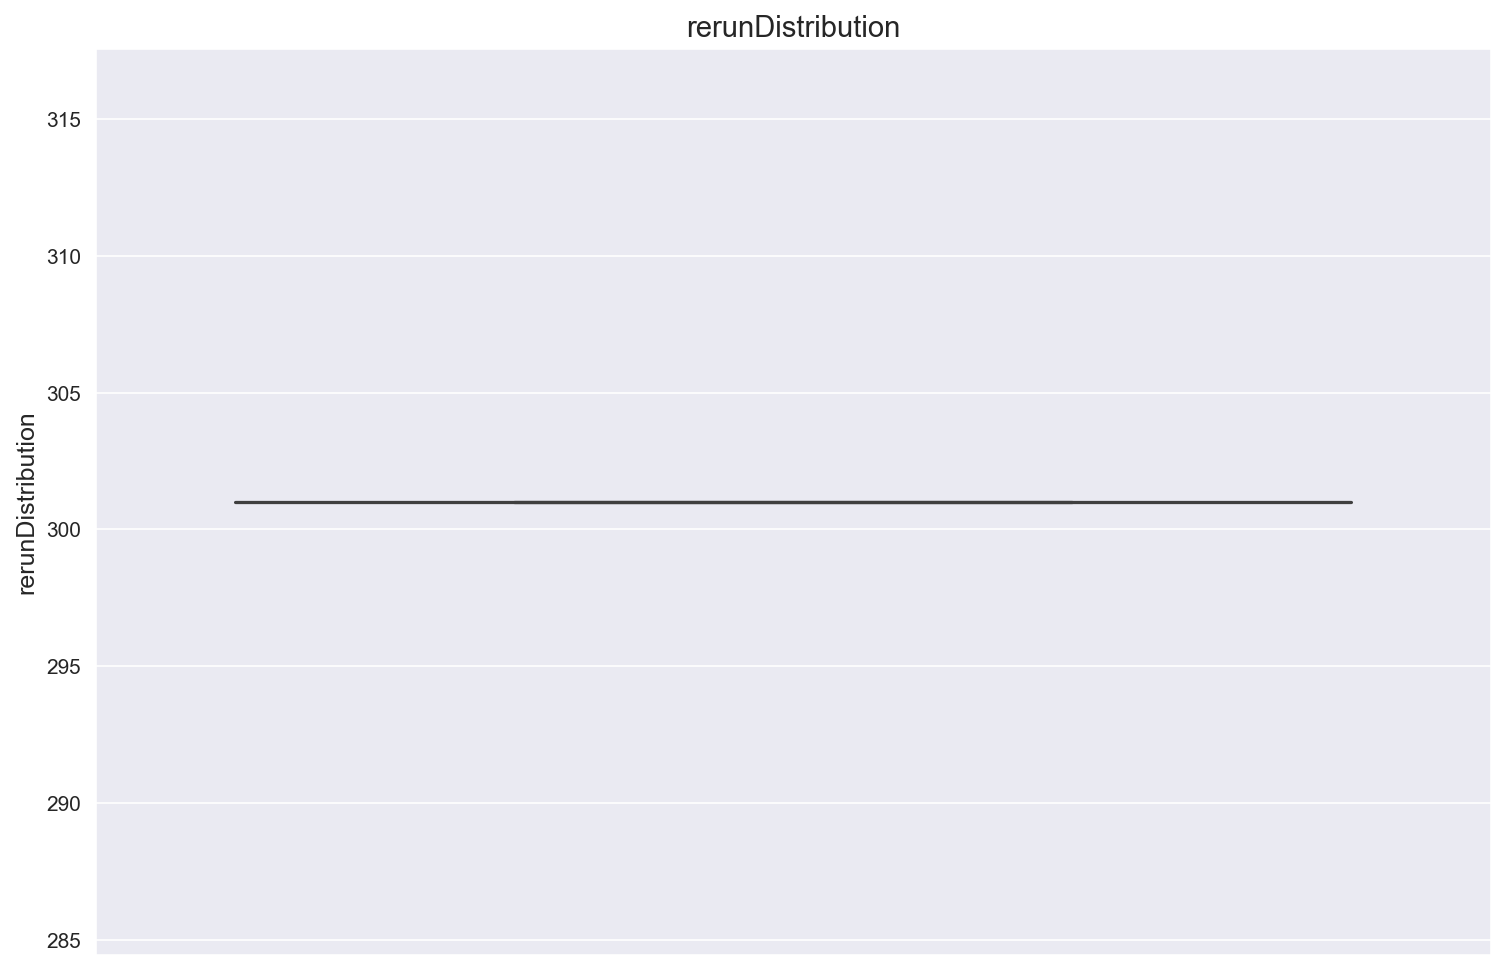

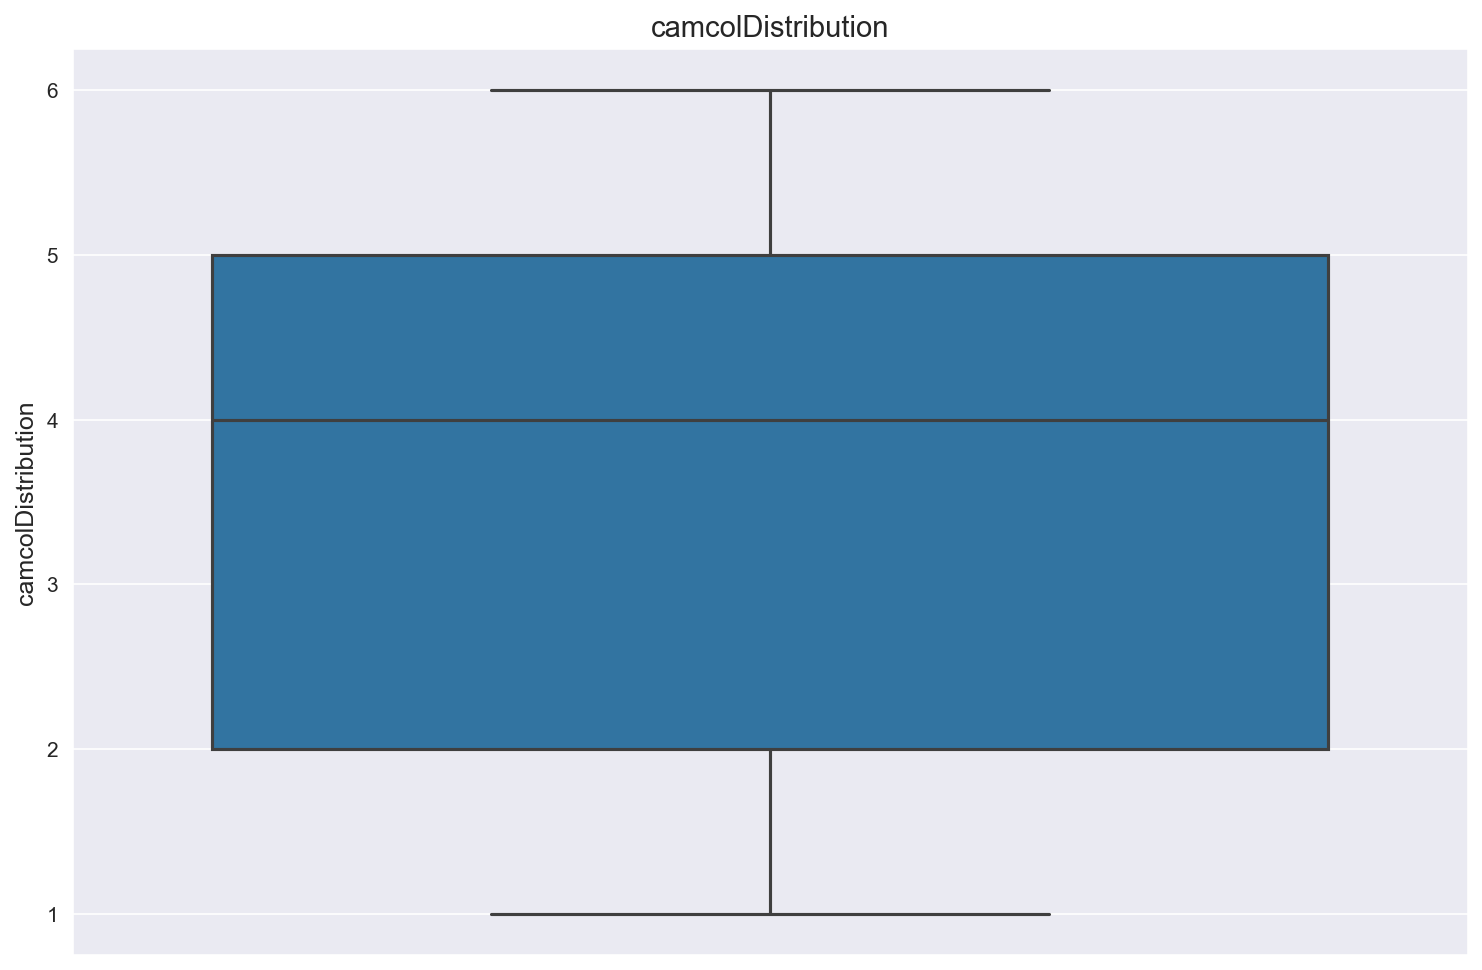

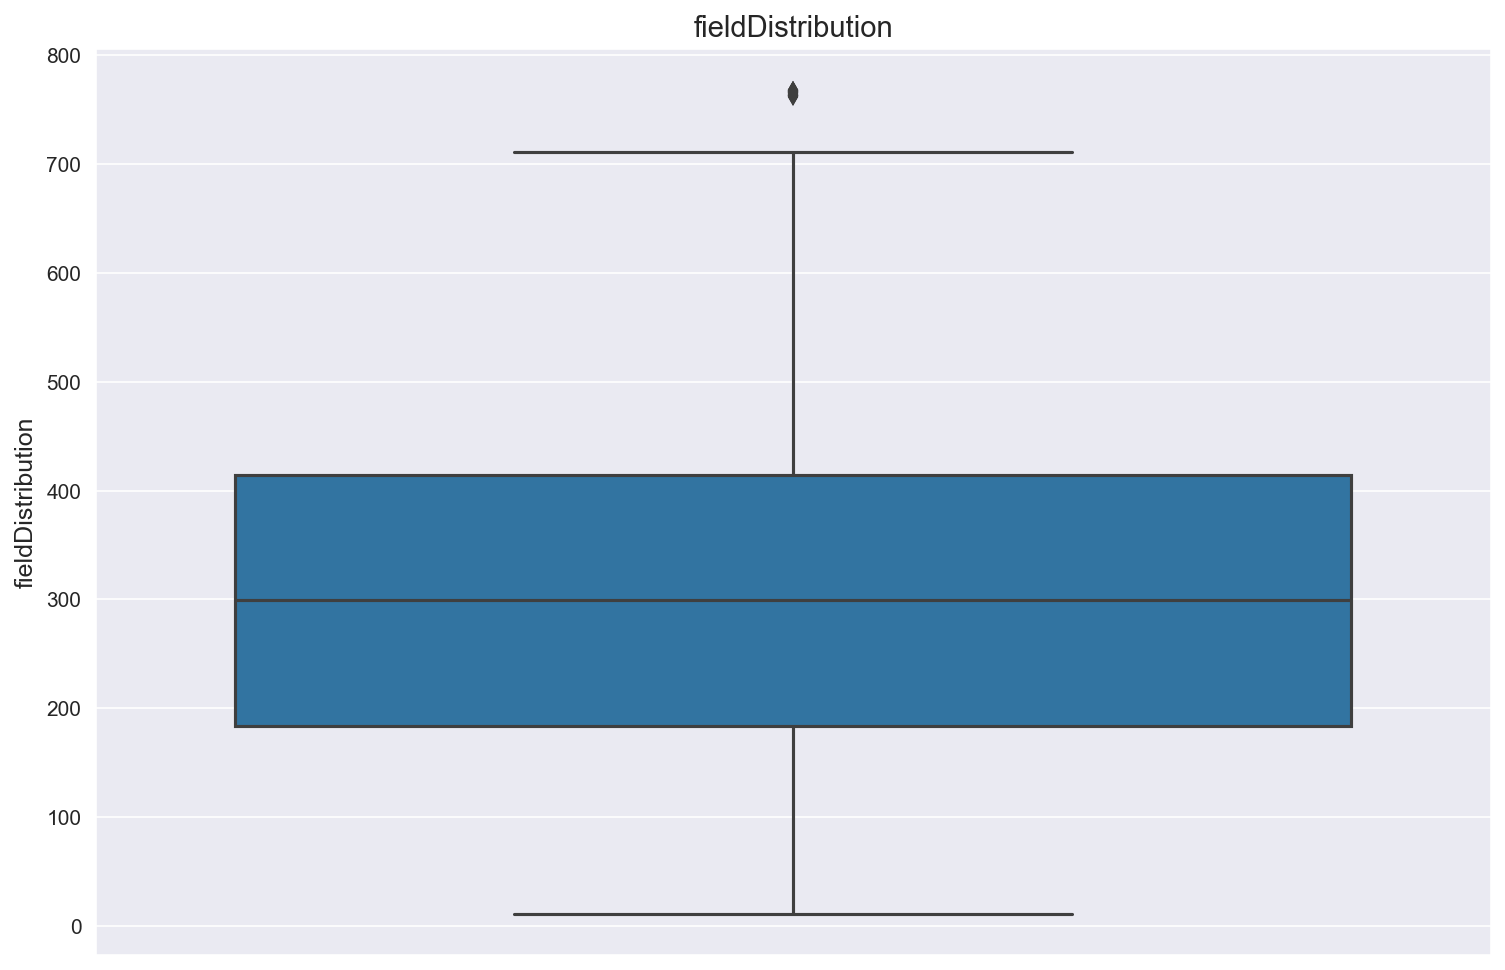

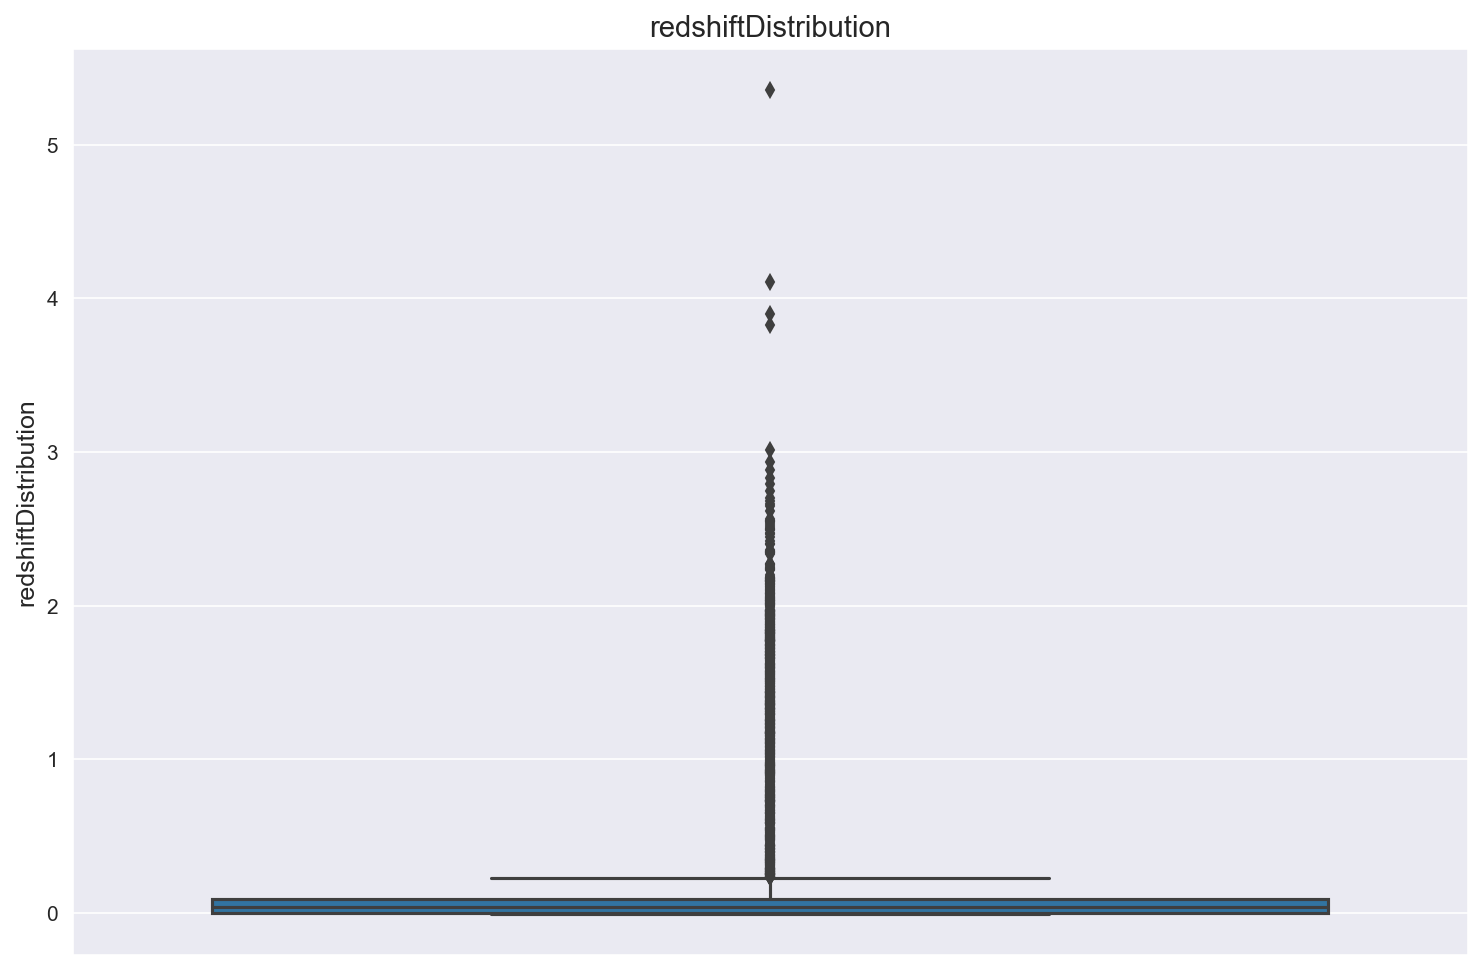

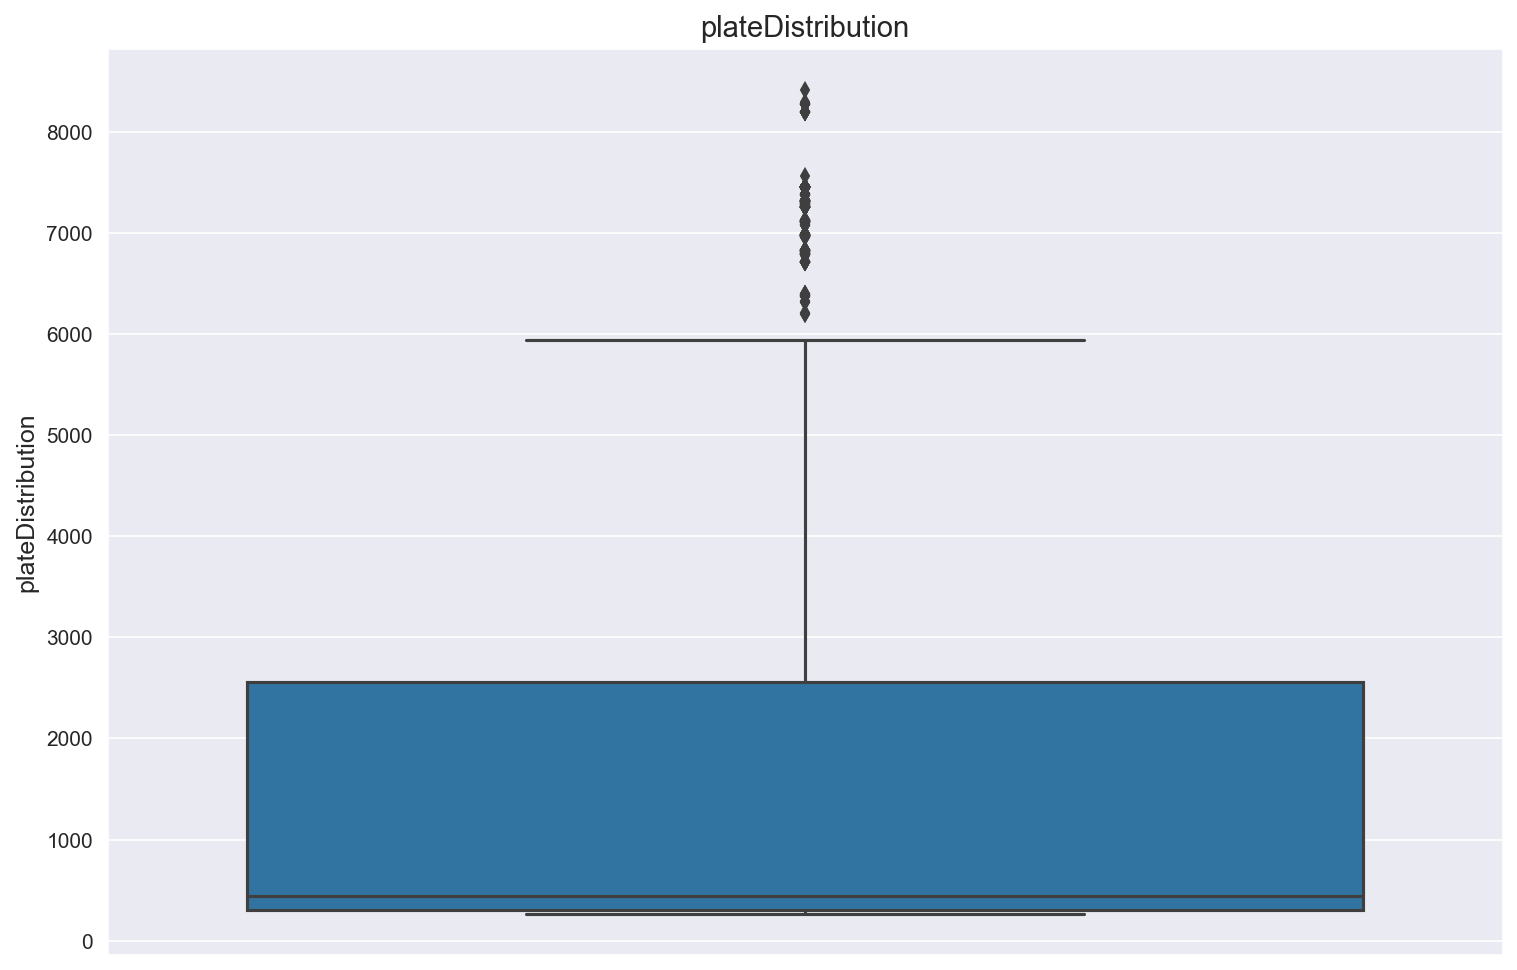

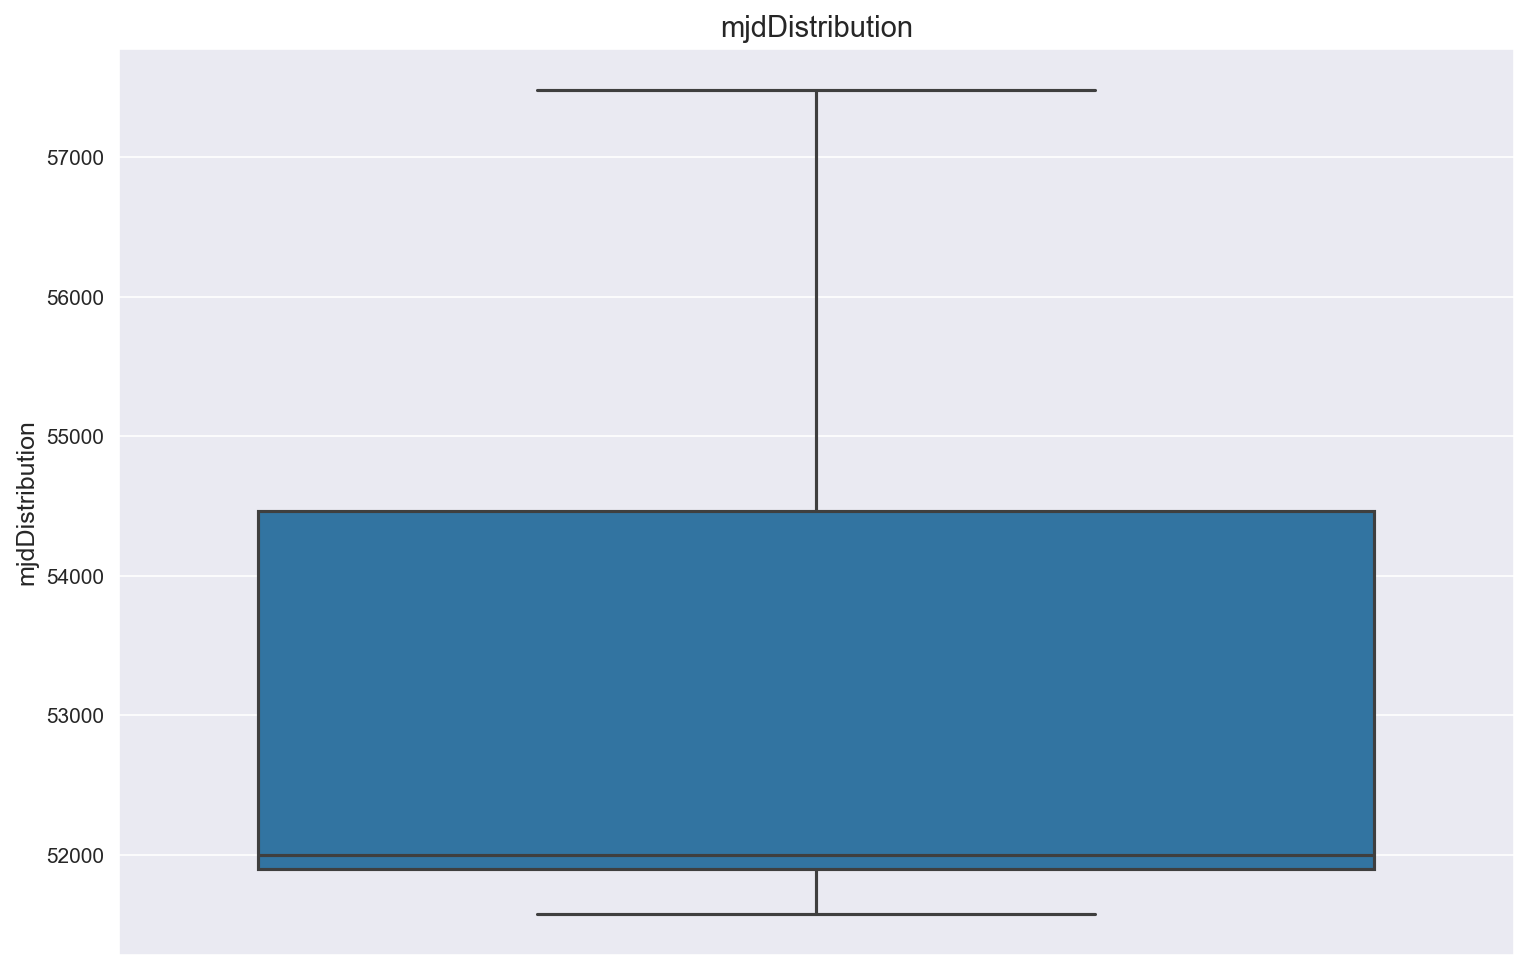

In [54]:
dx = df[['ra','dec','u','g','r','i','z','run','rerun','camcol','field','redshift','plate','mjd']]
for i in dx.columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=i, data=df)
    plt.ylabel(i+'Distribution', fontsize=12)
    plt.title(i+"Distribution", fontsize=14)
    plt.xticks(rotation='vertical')
    plt.show()

#### There are very few or no outliers

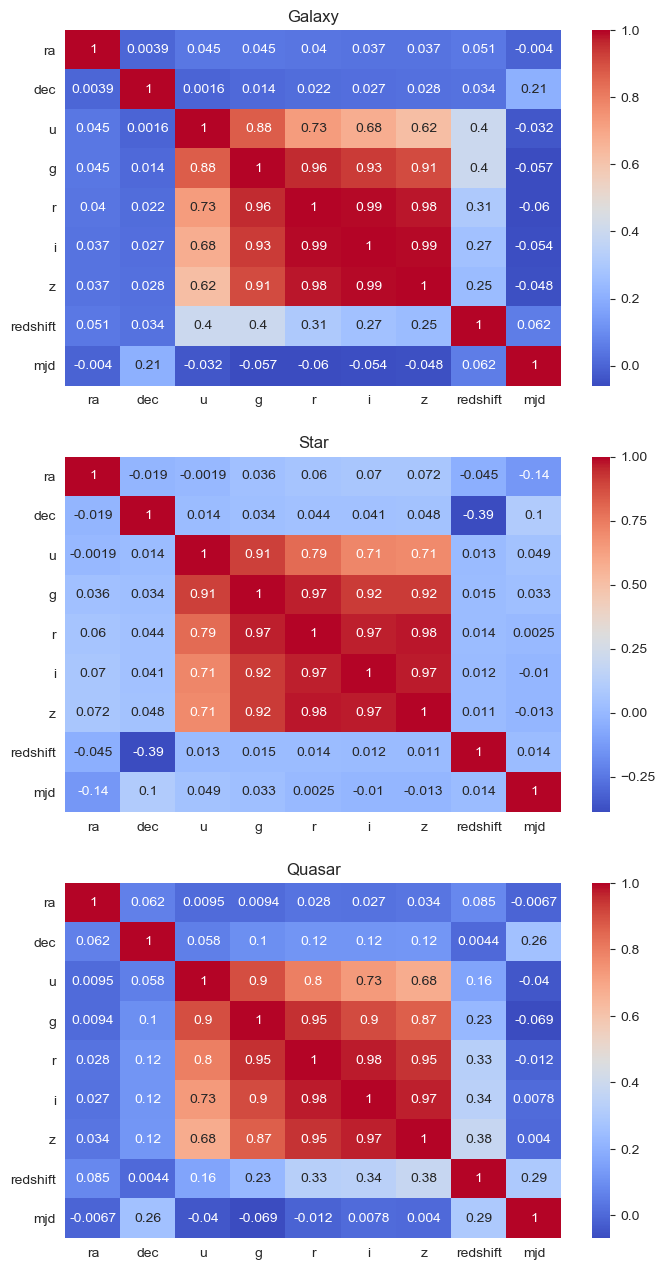

In [26]:
#Visualizing the correlation matrix between the characteristics of each class...

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(8, 16))
fig.set_dpi(100)
ax = sns.heatmap(data[data['class']=='GALAXY'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[0], cmap='coolwarm', annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(data[data['class']=='STAR'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[1], cmap='coolwarm', annot=True)
ax.set_title('Star')
ax = sns.heatmap(data[data['class']=='QSO'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[2], cmap='coolwarm', annot=True)
ax = ax.set_title('Quasar')

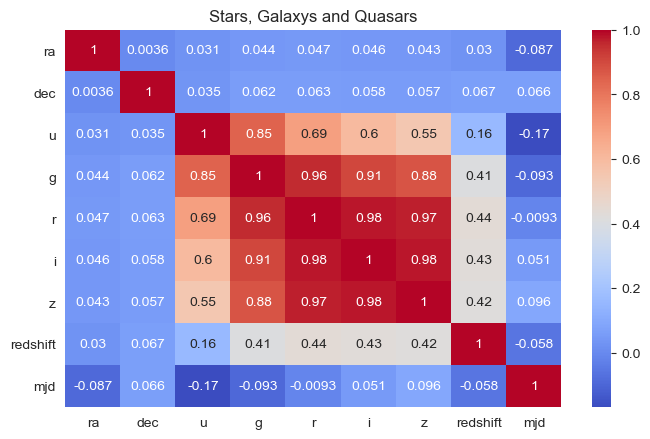

In [27]:
#all the classes together
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 5))
fig.set_dpi(100)
ax = sns.heatmap(data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), cmap='coolwarm', annot=True)
ax.set_title('Stars, Galaxys and Quasars');

### Analysis of color curves
#### The average, minimum and maximum of the Thuan-Gunn magnitudes are observed in search of some particularity.

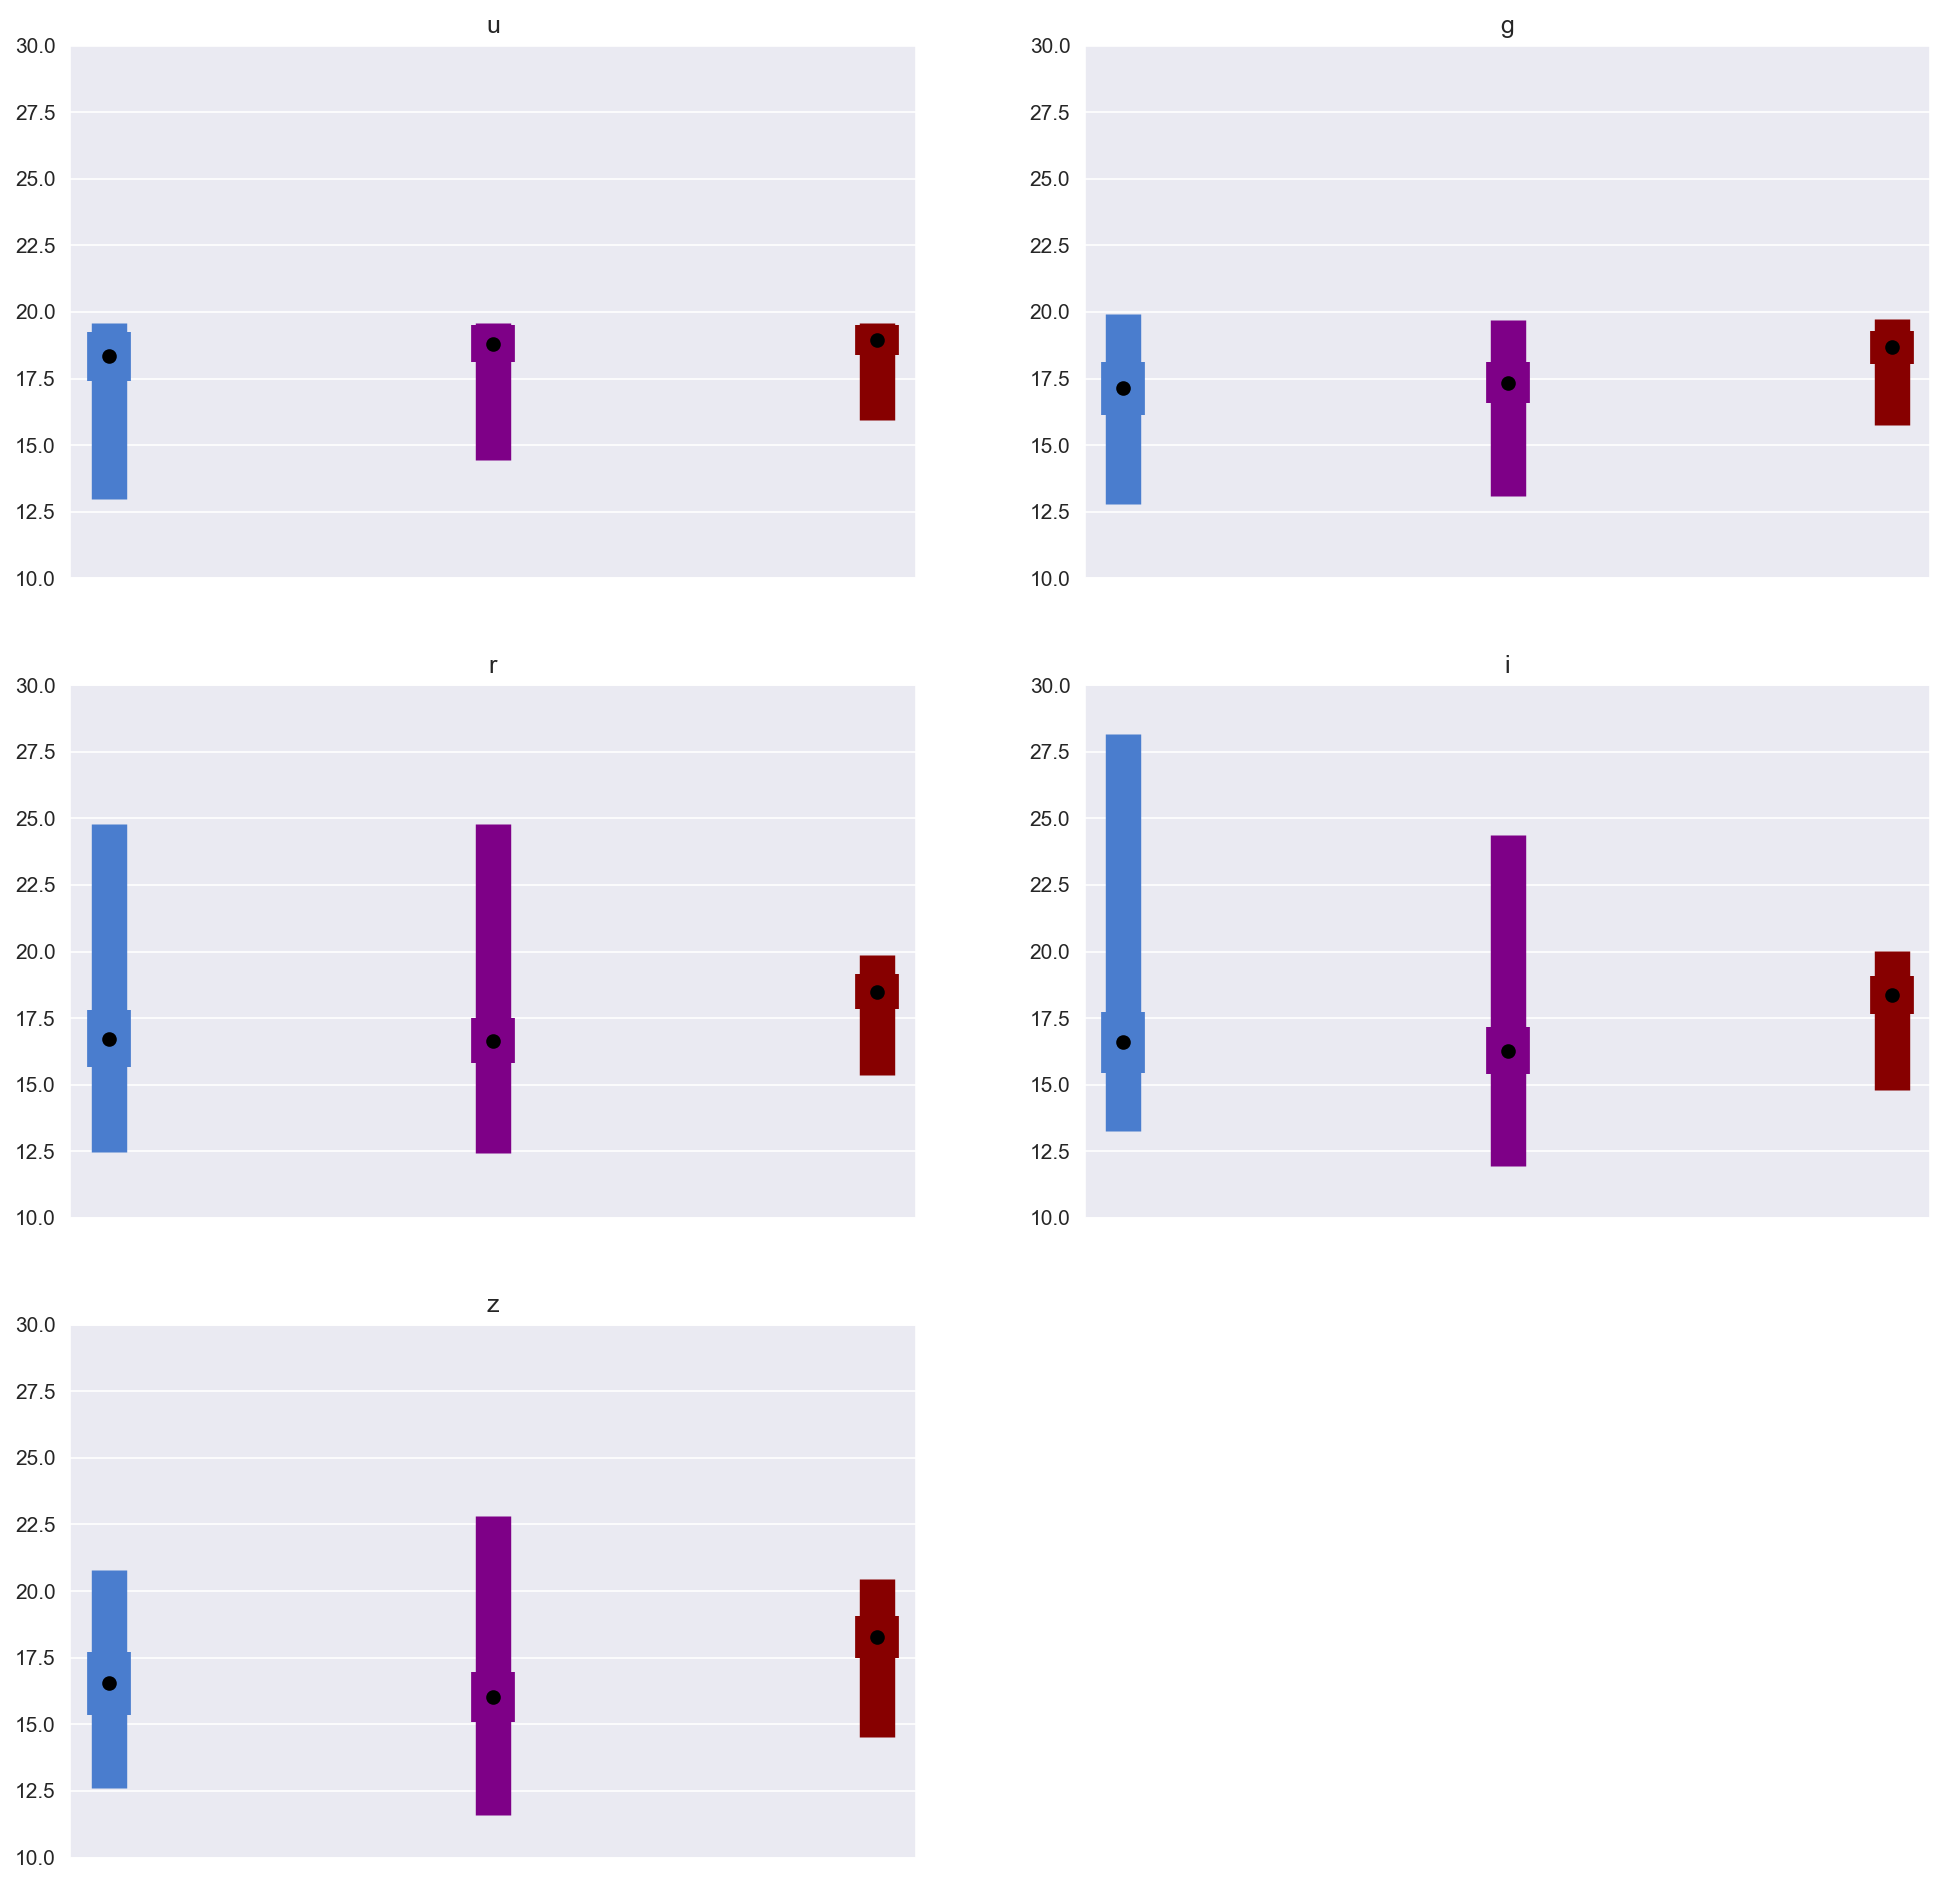

In [31]:
fig=plt.figure(1,figsize=(16,16))

ugriznames_array=['u','g','r','i','z']

for i in range(5):

    ax = fig.add_subplot(3, 2, i+1)
    ax.set_ylim(10,30)
    ax.xaxis.grid(False)
    # construct some data like what you have:
    u_errorbar= [data[data['class']=='STAR'][ugriznames_array[i]],
                 data[data['class']=='GALAXY'][ugriznames_array[i]],
                 data[data['class']=='QSO'][ugriznames_array[i]]]

    x=[0,1,2];

    mins = np.array([u_errorbar[0].min(0),u_errorbar[1].min(0),u_errorbar[2].min(0)])
    maxes = np.array([u_errorbar[0].max(0),u_errorbar[1].max(0),u_errorbar[2].max(0)])
    means = np.array([u_errorbar[0].mean(0),u_errorbar[1].mean(0),u_errorbar[2].mean(0)])
    std = np.array([u_errorbar[0].std(0),u_errorbar[1].std(0),u_errorbar[2].std(0)])

    # create stacked errorbars:
    plt.errorbar(np.arange(3), means, std, fmt='ok', linewidth=21, ecolor=array_color)
    plt.errorbar(np.arange(3), means, [means - mins, maxes - means],
                 fmt='.k', ecolor=array_color, lw=17)
    plt.tick_params( axis='x', which='both', bottom=False,
                    top=False, labelbottom=False)

    plt.title(ugriznames_array[i])

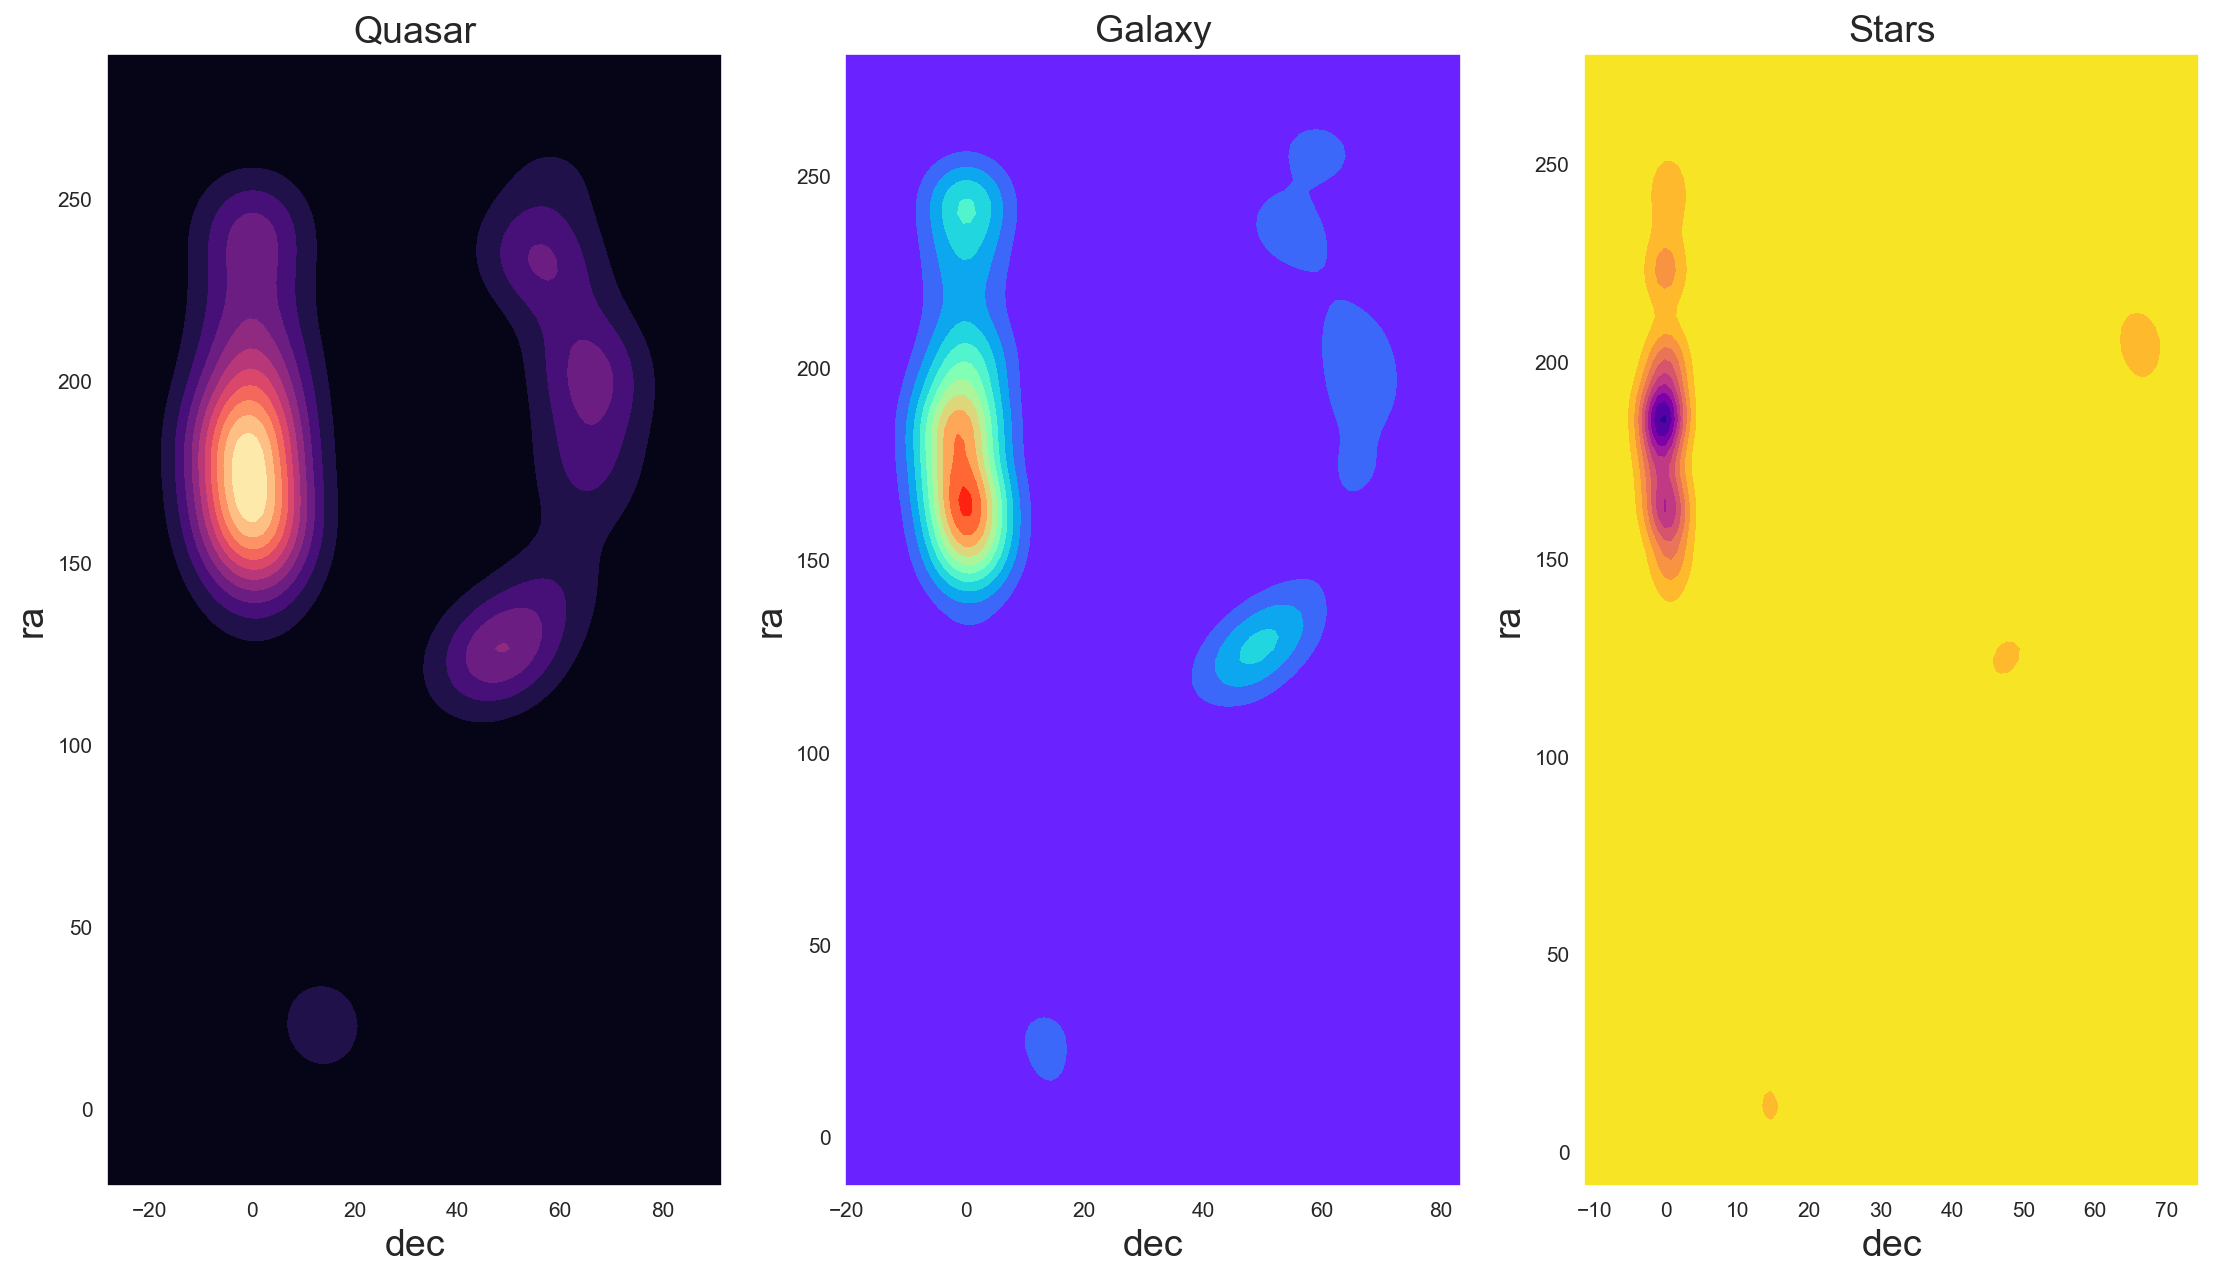

In [34]:
f,ax = plt.subplots(1,3,figsize=(18,10))
#k = sns.scatterplot("dec","ra",hue="class",data=data,cmap="magma")
Stars = data.loc[data["class"] == "STAR"]
Galaxy = data.loc[data["class"] == "GALAXY"]
Qso = data.loc[data["class"] == "QSO"]
k = sns.kdeplot(Qso.dec,Qso.ra,shade=True,shade_lowest=True,cmap="magma",ax=ax[0])
k = sns.kdeplot(Galaxy.dec,Galaxy.ra,shade=True,shade_lowest=True,cmap="rainbow",ax=ax[1])
k = sns.kdeplot(Stars.dec,Stars.ra,shade=True,shade_lowest=True,cmap="plasma_r",ax=ax[2])
ax[0].set_xlabel("dec", fontsize=18)
ax[1].set_xlabel("dec", fontsize=18)
ax[2].set_xlabel("dec", fontsize=18)
ax[0].set_ylabel("ra", fontsize=18)
ax[1].set_ylabel("ra", fontsize=18)
ax[2].set_ylabel("ra", fontsize=18)
ax[0].set_title("Quasar", fontsize=18)
ax[1].set_title("Galaxy", fontsize=18)
ax[2].set_title("Stars", fontsize=18)
#k = sns.kdeplot(data["dec"],data["ra"],shade=True,shade_lowest=False,cmap="magma",ax=ax)
plt.show()

#### Scatter plots

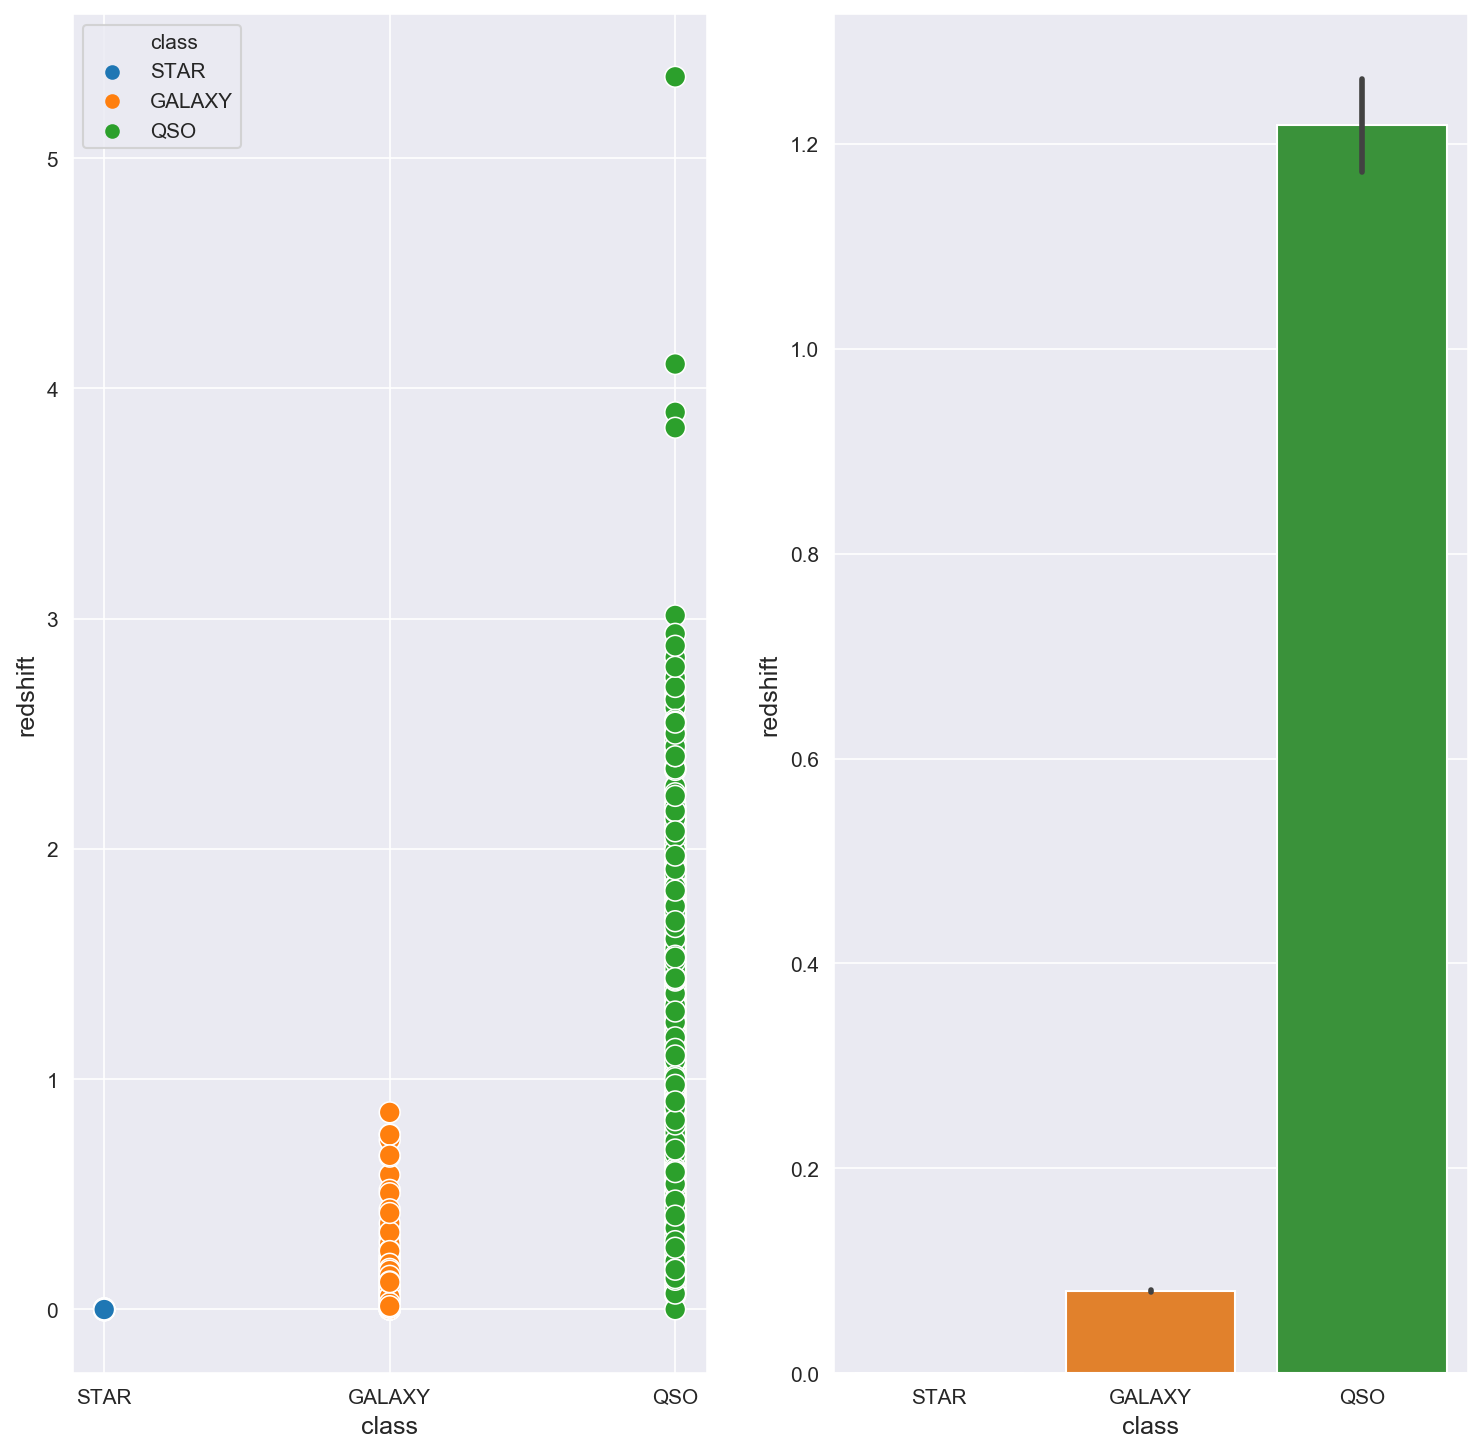

In [35]:
f,ax = plt.subplots(1,2,figsize=(12,12))
n = sns.scatterplot(data["class"],data["redshift"],hue=data["class"],s=100,ax=ax[0])
n = sns.barplot(data["class"],data["redshift"],ax=ax[1])
plt.show()

#### Run, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels.
#### A field can be identified by: - run number, which identifies the specific scan, - the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and - the field number. 
#### The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs. - An additional number, rerun, specifies how the image was processed

<Figure size 2700x2700 with 0 Axes>

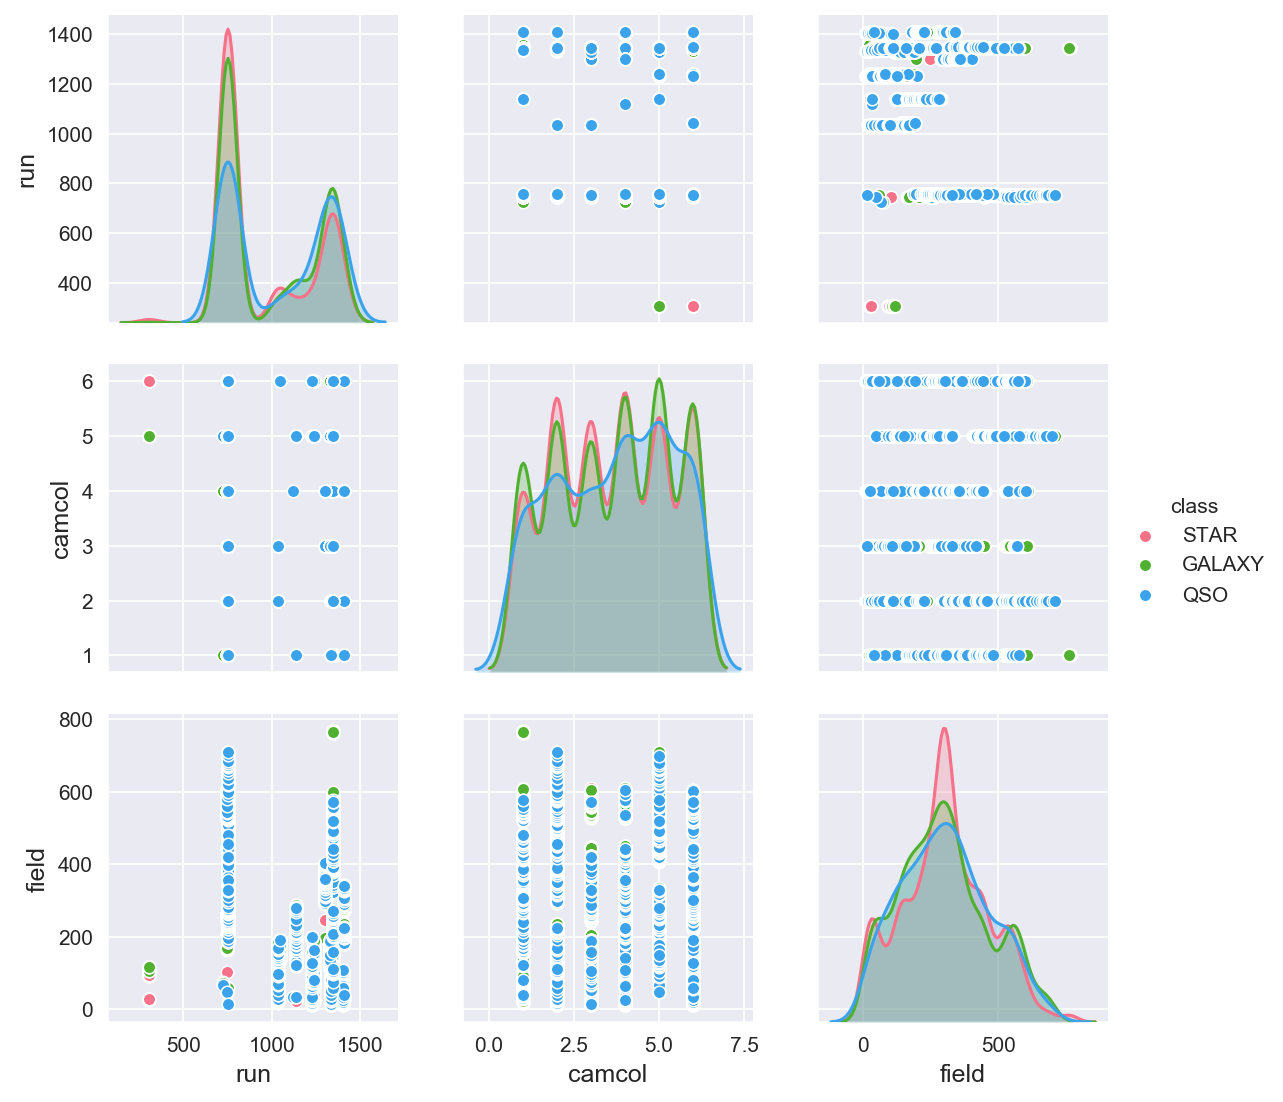

In [36]:
plt.figure(figsize=(18,18))
n = sns.pairplot(data[["run","camcol","field","class"]],hue="class",palette="husl")
plt.show()

#### In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum

#### Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS

#### Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken

#### The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID

<Figure size 2700x2700 with 0 Axes>

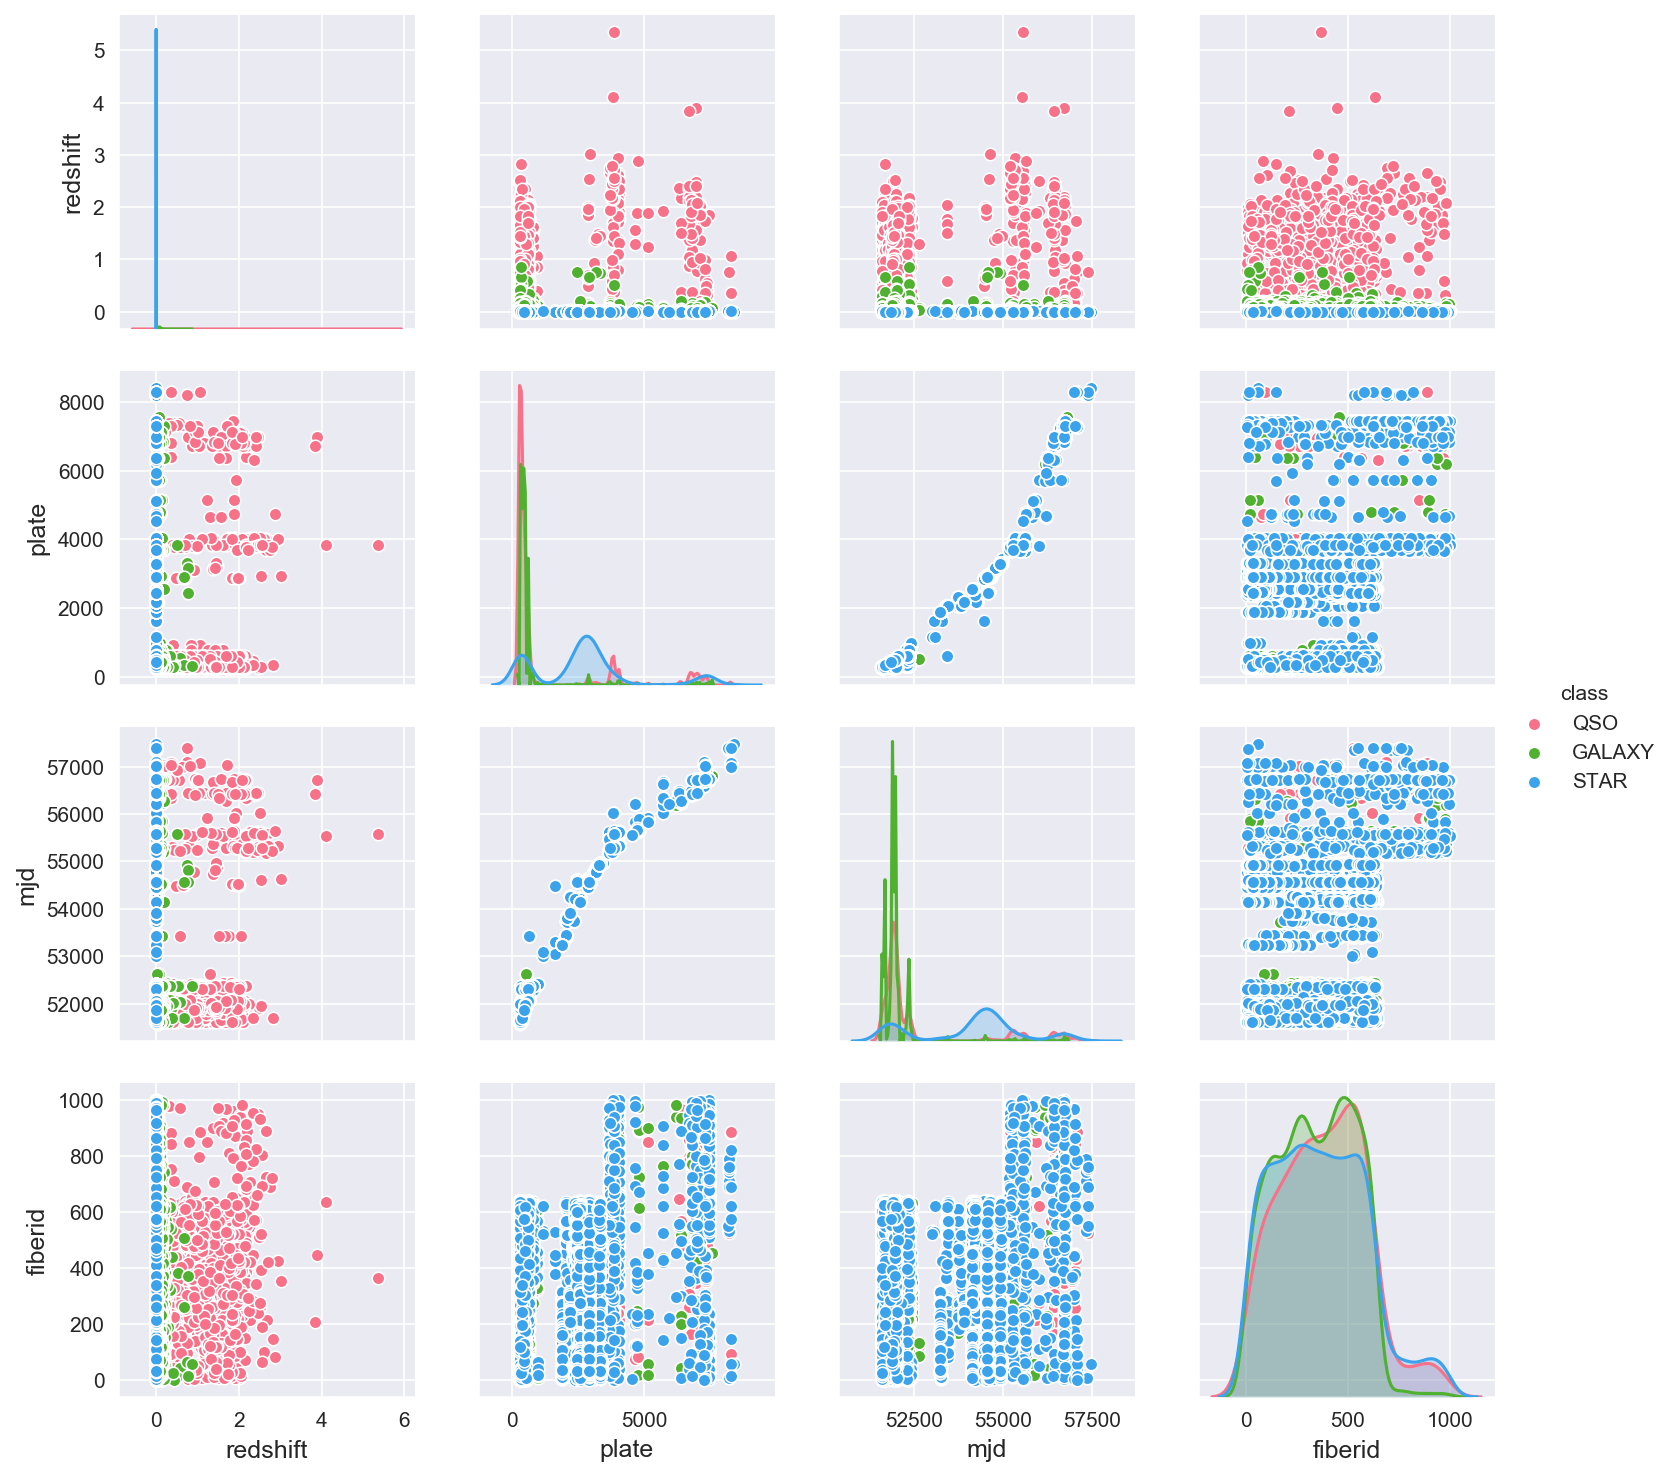

In [37]:
plt.figure(figsize=(18,18))
n = sns.pairplot(data[["redshift","plate","mjd","fiberid","class"]],hue="class",palette="husl",hue_order=["QSO","GALAXY","STAR"])
plt.show()

#### The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope

<Figure size 2700x2700 with 0 Axes>

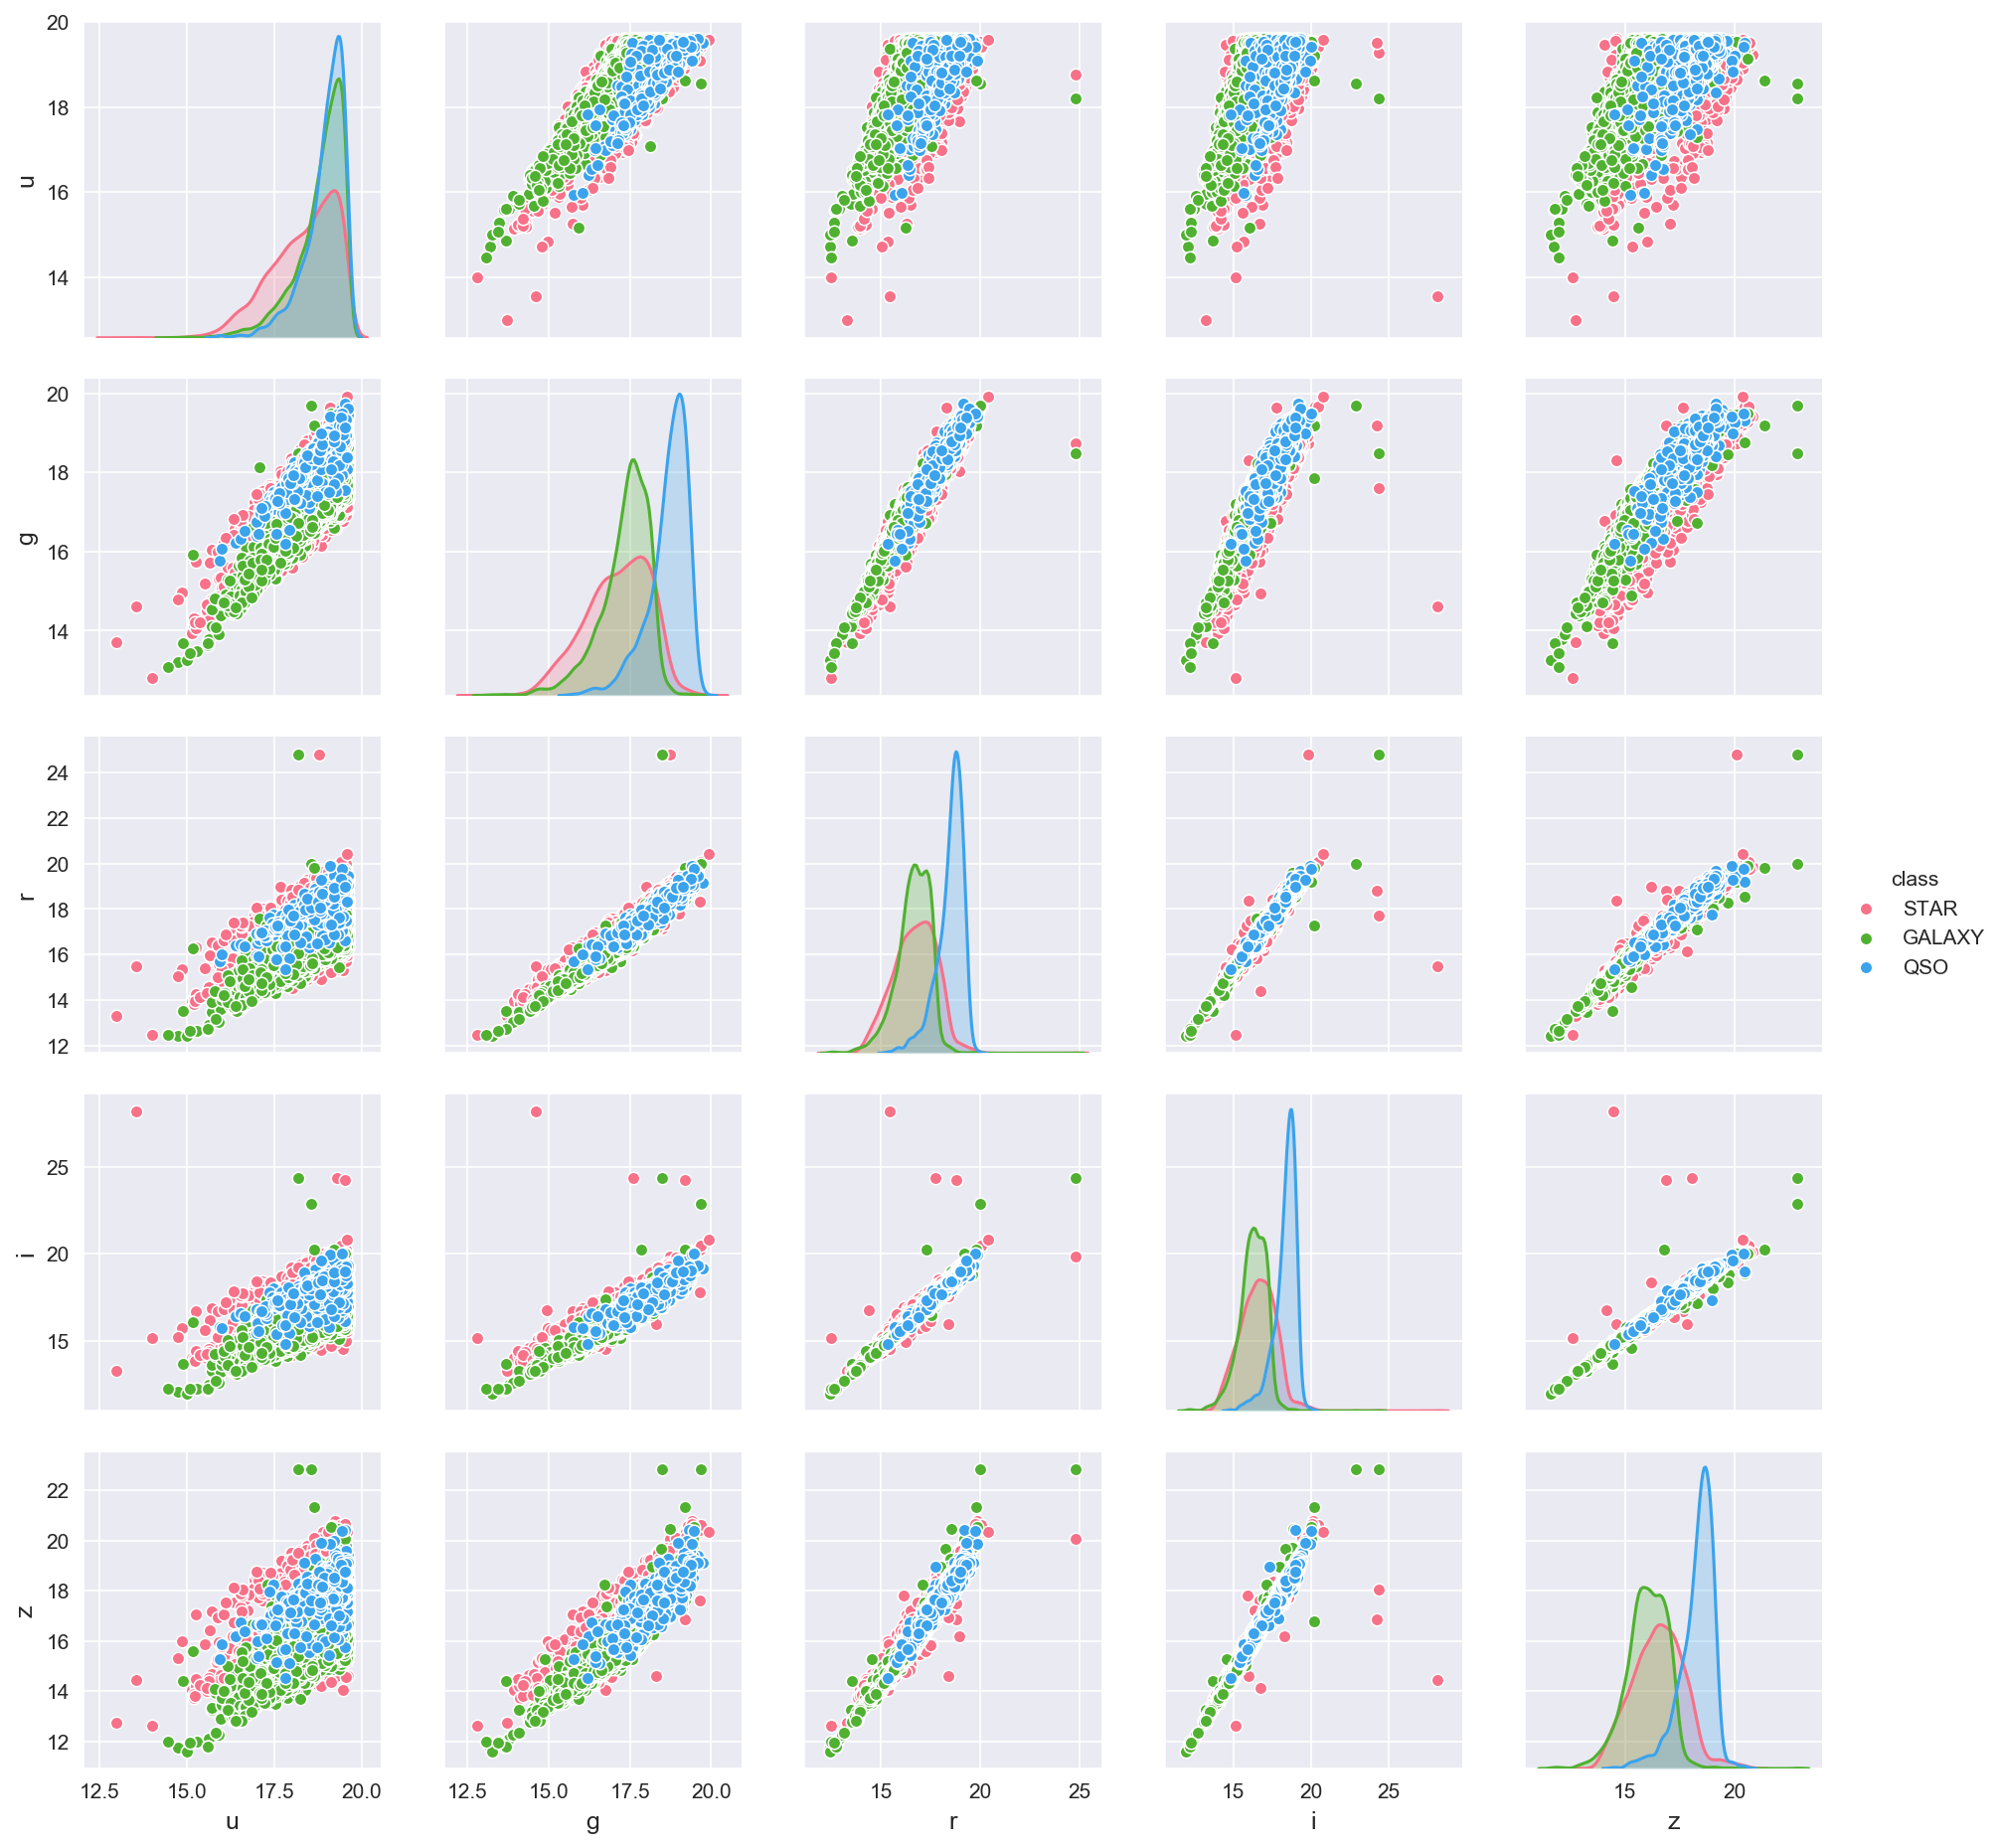

In [38]:
plt.figure(figsize=(18,18))
n1 = sns.pairplot(data[["u","g","r","i","z","class"]],hue="class",palette="husl")#,hue_order=["QSO","GALAXY","STAR"])
plt.show()

# CHECK

### Dimensional Reduction with U-Map

##### So it is probably the best dimensional reduction technique. Its much faster and much more better than t-SNE or PCA

import umap

embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(df.iloc[:20000, 1:])

plt.figure(figsize=(12,12))
plt.scatter(embedding[:20000, 0], embedding[:20000, 1], 
            c=df.iloc[:20000, 0], 
            edgecolor='none', 
            alpha=0.80, 
            s=10)
plt.axis('off');

### Dimensionality reduction
#### The variables related to the Thuan-Gunn magnitudes will be subject to a reduction in their dimensionality. Its very high correlation will allow us to reduce the number of dimensions without much loss of information. We will go from 5 to 2 characteristics, as reducing to 1 may be excessive as the correlation decreases when the variables are not close in the spectrum.

In [63]:
from sklearn.preprocessing import StandardScaler

In [126]:
features = ['u','g','r', 'i', 'z'];

# Normalization of the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# PCA

In [65]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=2)

prinComp = pca.fit_transform(x)

ugriz_pca_df = pd.DataFrame(data = prinComp, columns = ['ugriz_pca1','ugriz_pca2'])

In [128]:
final_data = pd.concat([df[['ra']], df[['dec']], ugriz_pca_df, df[['redshift']], df[['class']], df[['mjd']] ], axis = 1)

In [129]:
final_data.head()

,ra,dec,ugriz_pca1,ugriz_pca2,redshift,class,mjd
0,183.531326,0.089693,-1.063661,-1.605619,-0.000009,2,54922
1,183.598371,0.135285,-0.181554,-0.070793,-0.000055,2,51615
2,183.680207,0.126185,1.375966,-0.574447,0.123111,0,52023
3,183.870529,0.049911,-1.504058,0.574015,-0.000111,2,54922
4,183.883288,0.102557,-1.147961,1.290891,0.000590,2,54922


In [57]:
df.head(1)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.0424,15.94699,15.50342,15.22531,752,301,4,267,-0.000009,3306,54922


#### Feature Scaling before we apply SVM and KNN, which will be the first algorithms to be applied.

In [135]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score
import time

In [133]:
d = pd.DataFrame(final_data)

In [137]:
d = pd.DataFrame(scaler.fit_transform(d), columns=names)

In [138]:
d = pd.concat([d, class_num], axis=1)

In [139]:
d.head(6)

,ra,dec,ugriz_pca1,ugriz_pca2,redshift,mjd,class
0,0.693832,0.074025,0.441506,0.066876,0.000770,0.566492,2
1,0.694098,0.074642,0.488416,0.216500,0.000762,0.006268,2
2,0.694422,0.074519,0.571244,0.167401,0.023749,0.075385,0
3,0.695175,0.073487,0.418086,0.279360,0.000751,0.566492,2
4,0.695225,0.074199,0.437023,0.349246,0.000882,0.566492,2
5,0.695082,0.075162,0.640700,0.231773,0.000831,0.014908,2


#### Some algorithms don't support categorical classes so we'll have to replace them with numbers

In [136]:
class_num=pd.DataFrame(LabelEncoder().fit_transform(d['class']), columns=['class'])
d.drop(['class'], axis=1, inplace=True)
names=list(d)

In [90]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field',
       'redshift', 'plate', 'mjd', 'class'],
      dtype='object')

In [88]:
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [89]:
df['class'] = data['class'].astype('category').cat.codes

In [92]:
X_df = df.drop(['class'], axis=1).values
y_df = df['class'].values

In [93]:
display(X_df)
display(y_df)

array([[ 1.83531326e+02,  8.96930300e-02,  1.94740600e+01, ...,
        -8.96000000e-06,  3.30600000e+03,  5.49220000e+04],
       [ 1.83598371e+02,  1.35285032e-01,  1.86628000e+01, ...,
        -5.49000000e-05,  3.23000000e+02,  5.16150000e+04],
       [ 1.83680207e+02,  1.26185092e-01,  1.93829800e+01, ...,
         1.23111200e-01,  2.87000000e+02,  5.20230000e+04],
       ...,
       [ 1.31552562e+02,  5.16669864e+01,  1.87581800e+01, ...,
        -4.01573000e-04,  7.30300000e+03,  5.70130000e+04],
       [ 1.31477151e+02,  5.17530678e+01,  1.88828700e+01, ...,
         1.40189400e-02,  4.47000000e+02,  5.18770000e+04],
       [ 1.31665012e+02,  5.18053075e+01,  1.92758600e+01, ...,
         1.18417300e-01,  4.47000000e+02,  5.18770000e+04]])

array([2, 2, 0, ..., 2, 0, 0], dtype=int8)

In [96]:
scaler = MinMaxScaler()
X_df = scaler.fit_transform(X_df)

In [97]:
y_df = y_df.reshape(-1,1)

In [98]:
display(X_df)
display(y_df)

array([[6.93832273e-01, 7.40254729e-02, 9.80964857e-01, ...,
        7.70273543e-04, 3.73280943e-01, 5.66491614e-01],
       [6.94097640e-01, 7.46422070e-02, 8.58249898e-01, ...,
        7.61699432e-04, 6.99901768e-03, 6.26799932e-03],
       [6.94421555e-01, 7.45191099e-02, 9.67187673e-01, ...,
        2.37490694e-02, 2.57858546e-03, 7.53853973e-02],
       ...,
       [4.88097418e-01, 7.71724013e-01, 8.72677520e-01, ...,
        6.96997371e-04, 8.64071709e-01, 9.20718279e-01],
       [4.87798936e-01, 7.72888457e-01, 8.91538709e-01, ...,
        3.38840082e-03, 2.22249509e-02, 5.06522107e-02],
       [4.88542500e-01, 7.73595116e-01, 9.50984203e-01, ...,
        2.28730132e-02, 2.22249509e-02, 5.06522107e-02]])

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [0]], dtype=int8)

In [99]:
from sklearn.preprocessing import OneHotEncoder

In [100]:
enc = OneHotEncoder()
y_df = enc.fit_transform(y_df).toarray()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.25)

In [102]:
X_train.shape

(7500, 14)

In [103]:
y_train.shape

(7500, 3)

In [104]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
print("Accuracy of KNN: ", acc_knn)

Accuracy of KNN:  279.59999999999997


In [145]:
#A cross validation will be performed to ensure the reliability of the results.

#In addition, an isolated training will serve to measure the times and extract a matrix of confusion than will give us a general idea.

x=d.drop('class',axis=1);
y=d['class']

X_train, X_test, y_train, y_test = train_test_split(d.drop('class',axis=1), d['class'], test_size=0.4)

# Logistic Regression

In [140]:
from sklearn import linear_model, datasets

In [141]:
lr = linear_model.LogisticRegression()

The first iteration of the Logistic Regression gives an accuracy of the 87.88 %
[0=Galaxy 1=Quasar 2=Star]


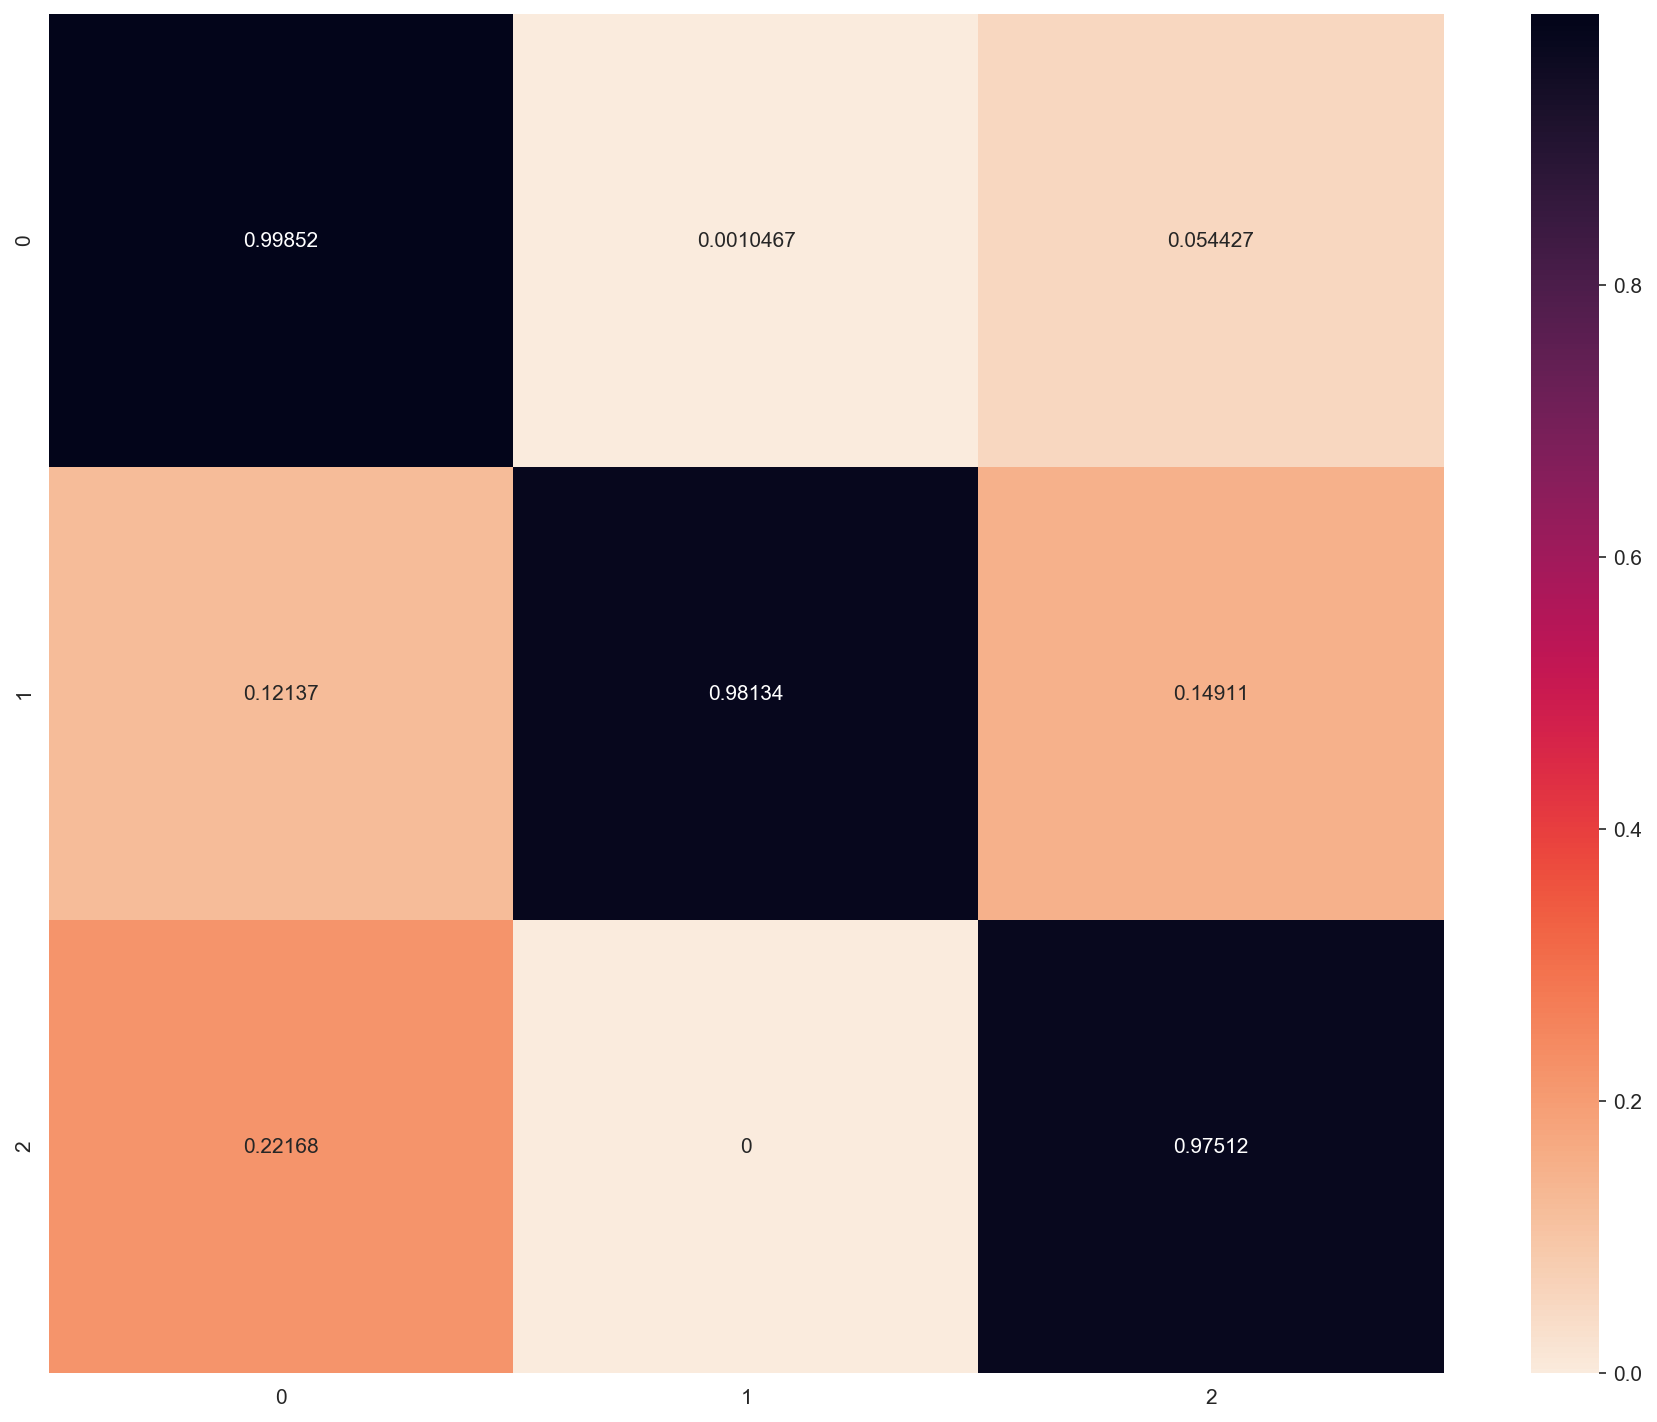

In [146]:
training_start = time.perf_counter()
lr.fit(X_train, y_train)#Training
training_end = time.perf_counter()

predict_start = time.perf_counter()
preds = lr.predict(X_test)#Prediction
predict_end = time.perf_counter()
acc_lreg = (preds == y_test).sum().astype(float) / len(preds)*100

print("The first iteration of the Logistic Regression gives an accuracy of the %3.2f %%" % (acc_lreg))

from numpy import linalg as LA
mc=confusion_matrix(y_test, preds)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g',);

print("[0=Galaxy 1=Quasar 2=Star]")

### This is the result of my last tests, before some additional manipulations with data
### And I think it was right, cause the new accuracy is equal to 279.6

In [115]:
dataset = pd.get_dummies(df)

In [116]:
dataset

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,-0.000009,3306,54922,2
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,-0.000055,323,51615,2
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0.123111,287,52023,0
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,-0.000111,3306,54922,2
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0.000590,3306,54922,2
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,0.000315,324,51666,2
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0.100242,287,52023,0
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,0.000315,3306,54922,2
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,0.000089,323,51615,2
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0.040508,288,52000,0


#### Our final data columns will be:

In [117]:
dataset.columns.values

array(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'redshift', 'plate', 'mjd', 'class'], dtype=object)

In [118]:
X = dataset.loc[:, dataset.columns != 'y']
y = dataset.loc[:, dataset.columns == 'y']

In [120]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [122]:
logreg = LogisticRegression()

In [123]:
logreg.fit(X_train, y_train)

ValueError: bad input shape (7500, 3)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    y, test_size=0.33)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
print("Accuracy of KNN: ", acc_knn)

In [72]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

In [74]:
accuracy_score(y_test, preds)

0.8024242424242424

In [78]:
confusion_matrix(y_test, preds)

array([[1087,  284,   13],
       [  93, 1534,    6],
       [  78,  178,   27]], dtype=int64)

In [80]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.86      0.79      0.82      1384
           2       0.77      0.94      0.85      1633
           3       0.59      0.10      0.16       283

    accuracy                           0.80      3300
   macro avg       0.74      0.61      0.61      3300
weighted avg       0.79      0.80      0.78      3300



In [94]:
X_train.shape

(6700, 14)

In [95]:
y_train.shape

(6700,)